### 📈 Race Pace Overview

This section analyzes driver performance by converting lap times into seconds and calculating statistics like mean, median, and best laps.  
It helps identify who had the most consistent pace and who delivered standout laps during the race.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import fastf1.plotting
import seaborn as sns
import pandas as pd
import matplotlib.ticker as ticker
from fastf1 import utils
from fastf1.plotting import TEAM_COLORS
from fastf1.utils import delta_time
import matplotlib.colors as mcolors
from matplotlib.collections import LineCollection
import matplotlib as mpl
from typing import Union
from matplotlib.collections import LineCollection
from matplotlib.colors import LinearSegmentedColormap

/Users/PietroPaolo/opt/anaconda3/envs/progLab/lib/python3.9/site-packages/fastf1/plotting/__init__.py:84: FutureWarning: INCOMPATIBLE with 2025 season! TEAM_COLORS is deprecated and will be removed in a future version.
  warnings.warn(f"INCOMPATIBLE with 2025 season! {name} is deprecated "


In [2]:
# enable some matplotlib patches for plotting timedelta values and load
# FastF1's default color scheme
fastf1.plotting.setup_mpl(misc_mpl_mods=False, color_scheme='fastf1')


# load a session and its telemetry data
session = fastf1.get_session(2025, 'Austrian Grand Prix', 'R')
session.load()
# Get only drivers who finished the race
results = session.results
# Exclude drivers who Retired, Did Not Start, or Did Not Finish
excluded_statuses = ['Retired', 'Did not start', 'Did not finish']

# Keep only drivers who have a clean status (finished the race)
finished_drivers = results[~results['Status'].isin(excluded_statuses)]['Abbreviation'].tolist()

# Get all laps, excluding box laps and inaccurate laps
laps = session.laps.pick_wo_box()
laps = laps[laps['IsAccurate'] == True]

# Filter only laps from drivers who finished the race
laps = laps[laps['Driver'].isin(finished_drivers)]

# Get circuit info (unchanged)
circuit_info = session.get_circuit_info()




req         WARNING 	DEFAULT CACHE ENABLED! (6.84 GB) /Users/PietroPaolo/Library/Caches/fastf1
core           INFO 	Loading data for Austrian Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['4', '81', '16', '44', '63', '30', '14', '5', '27', '31', '87', '6', '10', '18', '

In [3]:
display(results)

,DriverNumber,BroadcastName,Abbreviation,DriverId,TeamName,TeamColor,TeamId,FirstName,LastName,FullName,...,CountryCode,Position,ClassifiedPosition,GridPosition,Q1,Q2,Q3,Time,Status,Points
4,4,L NORRIS,NOR,norris,McLaren,F47600,mclaren,Lando,Norris,Lando Norris,...,,1.0,1,1.0,NaT,NaT,NaT,0 days 01:23:47.693000,Finished,25.0
81,81,O PIASTRI,PIA,piastri,McLaren,F47600,mclaren,Oscar,Piastri,Oscar Piastri,...,,2.0,2,3.0,NaT,NaT,NaT,0 days 00:00:02.695000,Finished,18.0
16,16,C LECLERC,LEC,leclerc,Ferrari,ED1131,ferrari,Charles,Leclerc,Charles Leclerc,...,,3.0,3,2.0,NaT,NaT,NaT,0 days 00:00:19.820000,Finished,15.0
44,44,L HAMILTON,HAM,hamilton,Ferrari,ED1131,ferrari,Lewis,Hamilton,Lewis Hamilton,...,,4.0,4,4.0,NaT,NaT,NaT,0 days 00:00:29.020000,Finished,12.0
63,63,G RUSSELL,RUS,russell,Mercedes,00D7B6,mercedes,George,Russell,George Russell,...,,5.0,5,5.0,NaT,NaT,NaT,0 days 00:01:02.396000,Finished,10.0
30,30,L LAWSON,LAW,lawson,Racing Bulls,6C98FF,rb,Liam,Lawson,Liam Lawson,...,,6.0,6,6.0,NaT,NaT,NaT,0 days 00:01:07.754000,Finished,8.0
14,14,F ALONSO,ALO,alonso,Aston Martin,229971,aston_martin,Fernando,Alonso,Fernando Alonso,...,,7.0,7,11.0,NaT,NaT,NaT,0 days 00:00:01.437000,Lapped,6.0
5,5,G BORTOLETO,BOR,bortoleto,Kick Sauber,01C00E,sauber,Gabriel,Bortoleto,Gabriel Bortoleto,...,,8.0,8,8.0,NaT,NaT,NaT,0 days 00:00:01.952000,Lapped,4.0
27,27,N HULKENBERG,HUL,hulkenberg,Kick Sauber,01C00E,sauber,Nico,Hulkenberg,Nico Hulkenberg,...,,9.0,9,20.0,NaT,NaT,NaT,0 days 00:00:07.720000,Lapped,2.0
31,31,E OCON,OCO,ocon,Haas F1 Team,9C9FA2,haas,Esteban,Ocon,Esteban Ocon,...,,10.0,10,17.0,NaT,NaT,NaT,0 days 00:00:09.986000,Lapped,1.0


In [4]:
display(laps)

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
3,0 days 01:17:35.114000,NOR,4,0 days 00:01:10.254000,4.0,1.0,NaT,NaT,0 days 00:00:17.564000,0 days 00:00:31.393000,...,True,McLaren,0 days 01:16:24.860000,2025-06-29 13:23:17.653,1,1.0,False,,False,True
4,0 days 01:18:44.972000,NOR,4,0 days 00:01:09.858000,5.0,1.0,NaT,NaT,0 days 00:00:17.488000,0 days 00:00:31.430000,...,True,McLaren,0 days 01:17:35.114000,2025-06-29 13:24:27.907,1,1.0,False,,False,True
5,0 days 01:19:54.432000,NOR,4,0 days 00:01:09.460000,6.0,1.0,NaT,NaT,0 days 00:00:17.460000,0 days 00:00:31.107000,...,True,McLaren,0 days 01:18:44.972000,2025-06-29 13:25:37.765,1,1.0,False,,False,True
6,0 days 01:21:03.745000,NOR,4,0 days 00:01:09.313000,7.0,1.0,NaT,NaT,0 days 00:00:17.393000,0 days 00:00:30.992000,...,True,McLaren,0 days 01:19:54.432000,2025-06-29 13:26:47.225,1,1.0,False,,False,True
7,0 days 01:22:13.139000,NOR,4,0 days 00:01:09.394000,8.0,1.0,NaT,NaT,0 days 00:00:17.407000,0 days 00:00:31.156000,...,True,McLaren,0 days 01:21:03.745000,2025-06-29 13:27:56.538,1,1.0,False,,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1104,0 days 02:30:13.350000,TSU,22,0 days 00:01:10.561000,64.0,4.0,NaT,NaT,0 days 00:00:17.486000,0 days 00:00:31.547000,...,True,Red Bull Racing,0 days 02:29:02.789000,2025-06-29 14:35:55.582,1,16.0,False,,False,True
1105,0 days 02:31:25.476000,TSU,22,0 days 00:01:12.126000,65.0,4.0,NaT,NaT,0 days 00:00:19.059000,0 days 00:00:31.774000,...,True,Red Bull Racing,0 days 02:30:13.350000,2025-06-29 14:37:06.143,1,16.0,False,,False,True
1106,0 days 02:32:36.252000,TSU,22,0 days 00:01:10.776000,66.0,4.0,NaT,NaT,0 days 00:00:17.333000,0 days 00:00:31.419000,...,True,Red Bull Racing,0 days 02:31:25.476000,2025-06-29 14:38:18.269,1,16.0,False,,False,True
1107,0 days 02:33:49.417000,TSU,22,0 days 00:01:13.165000,67.0,4.0,NaT,NaT,0 days 00:00:19.857000,0 days 00:00:31.872000,...,True,Red Bull Racing,0 days 02:32:36.252000,2025-06-29 14:39:29.045,1,16.0,False,,False,True


In [5]:
drivers =laps['Driver'].unique()
compounds = laps['Compound'].unique()


In [6]:
def timedelta_to_seconds(td: pd.Timedelta) -> float:
    """
    Convert a pandas Timedelta to a float representing the total seconds.

    Parameters:
    - td: pd.Timedelta

    Returns:
    - float: total seconds
    """
    return td.total_seconds()

In [7]:
# Transform the laps in total seconds
transformed_laps = laps.copy()
transformed_laps.loc[:, "LapTime (s)"] = laps["LapTime"].dt.total_seconds()



# order the team from the fastest (lowest median lap time) to slower
team_order = (
    transformed_laps[["Team", "LapTime (s)"]]
    .groupby("Team")
    .median()["LapTime (s)"]
    .sort_values()
    .index
)

# make a color palette associating team names to hex codes

specific_color_kick_sauber = '#90EE90'  # Light green
specific_color_alpha_tauri = '#1634cb'  # Specific blue color

def get_team_color(team):
    # Clean up team names by stripping extra spaces
    team = team.strip()

    if team == 'Kick Sauber' or team == 'Alfa Romeo':
        return specific_color_kick_sauber
    elif team == 'AlphaTauri':
        return specific_color_alpha_tauri
    else:
        try:
            # Use the internal TEAM_COLORS dictionary for the team color
            return TEAM_COLORS[team.lower()]  # Ensure team name matches the expected format
        except KeyError:
            return '#000000'  # Default color (black) if team is not recognized

# Create the palette, ensuring teams are processed correctly
team_palette = {team: get_team_color(team) for team in team_order}

In [8]:
colors = {
    # Red Bull Racing
    "VER": "blue",  # Max Verstappen
    "TSU": "blue",  # Liam Lawson

    # McLaren
    "NOR": "orange",  # Lando Norris
    "PIA": "orange",  # Oscar Piastri

    # Ferrari
    "LEC": "red",    # Charles Leclerc§
    "HAM": "red",    # Lewis Hamilton

    # Mercedes
    "RUS": "grey",   # George Russell
    "ANT": "grey",   # Andrea Kimi Antonelli

    # Aston Martin
    "ALO": "green",  # Fernando Alonso
    "STR": "green",  # Lance Stroll

    # Alpine
    "GAS": "pink",   # Pierre Gasly
    "COL": "pink",   # Jack Doohan

    # Haas
    "OCO": "olive",  # Esteban Ocon
    "BEA": "olive",  # Oliver Bearman

    # Racing Bulls (formerly AlphaTauri)
    "HAD": "#9932CC",  # Isack Hadjar
    "LAW": "#9932CC",  # Yuki Tsunoda

    # Williams
    "ALB": "navy",   # Alexander Albon
    "SAI": "navy",   # Carlos Sainz Jr.

    # Sauber (transitioning to Audi)
    "HUL": "lime",   # Nico Hülkenberg
    "BOR": "lime",   # Gabriel Bortoleto
}

In [9]:
def interpolate_dataframe(df):
    # Creating a new DataFrame with interpolated data
    new_df = pd.DataFrame()

    for column in df.columns:
        # Interpolating each column
        original_data = df[column].to_numpy()
        interleaved_data = np.empty(2 * len(original_data) - 1, dtype=original_data.dtype)
        
        # Fill with original data in even indices
        interleaved_data[0::2] = original_data

        # Check the data type of the column
        if np.issubdtype(original_data.dtype, np.number):
            # Interpolated data for numerical columns
            interleaved_data[1::2] = (original_data[:-1] + original_data[1:]) / 2
        elif np.issubdtype(original_data.dtype, np.datetime64):
            # Interpolated data for datetime columns
            interleaved_data[1::2] = (original_data[:-1] + (original_data[1:] - original_data[:-1]) / 2)
        elif np.issubdtype(original_data.dtype, np.bool_):
            # For boolean columns, use logical interpolation (e.g., keep the previous value)
            interleaved_data[1::2] = original_data[:-1]
        else:
            # For any other types, fallback to forward fill
            interleaved_data[1::2] = original_data[:-1]

        # Assigning the new column to the new DataFrame
        new_df[column] = interleaved_data

    return new_df

### 🏁 Team Performance Comparison

Teams are ranked by their median lap time across the race.  
This gives a high-level overview of overall race competitiveness, showing which teams delivered strong race setups and consistent execution.

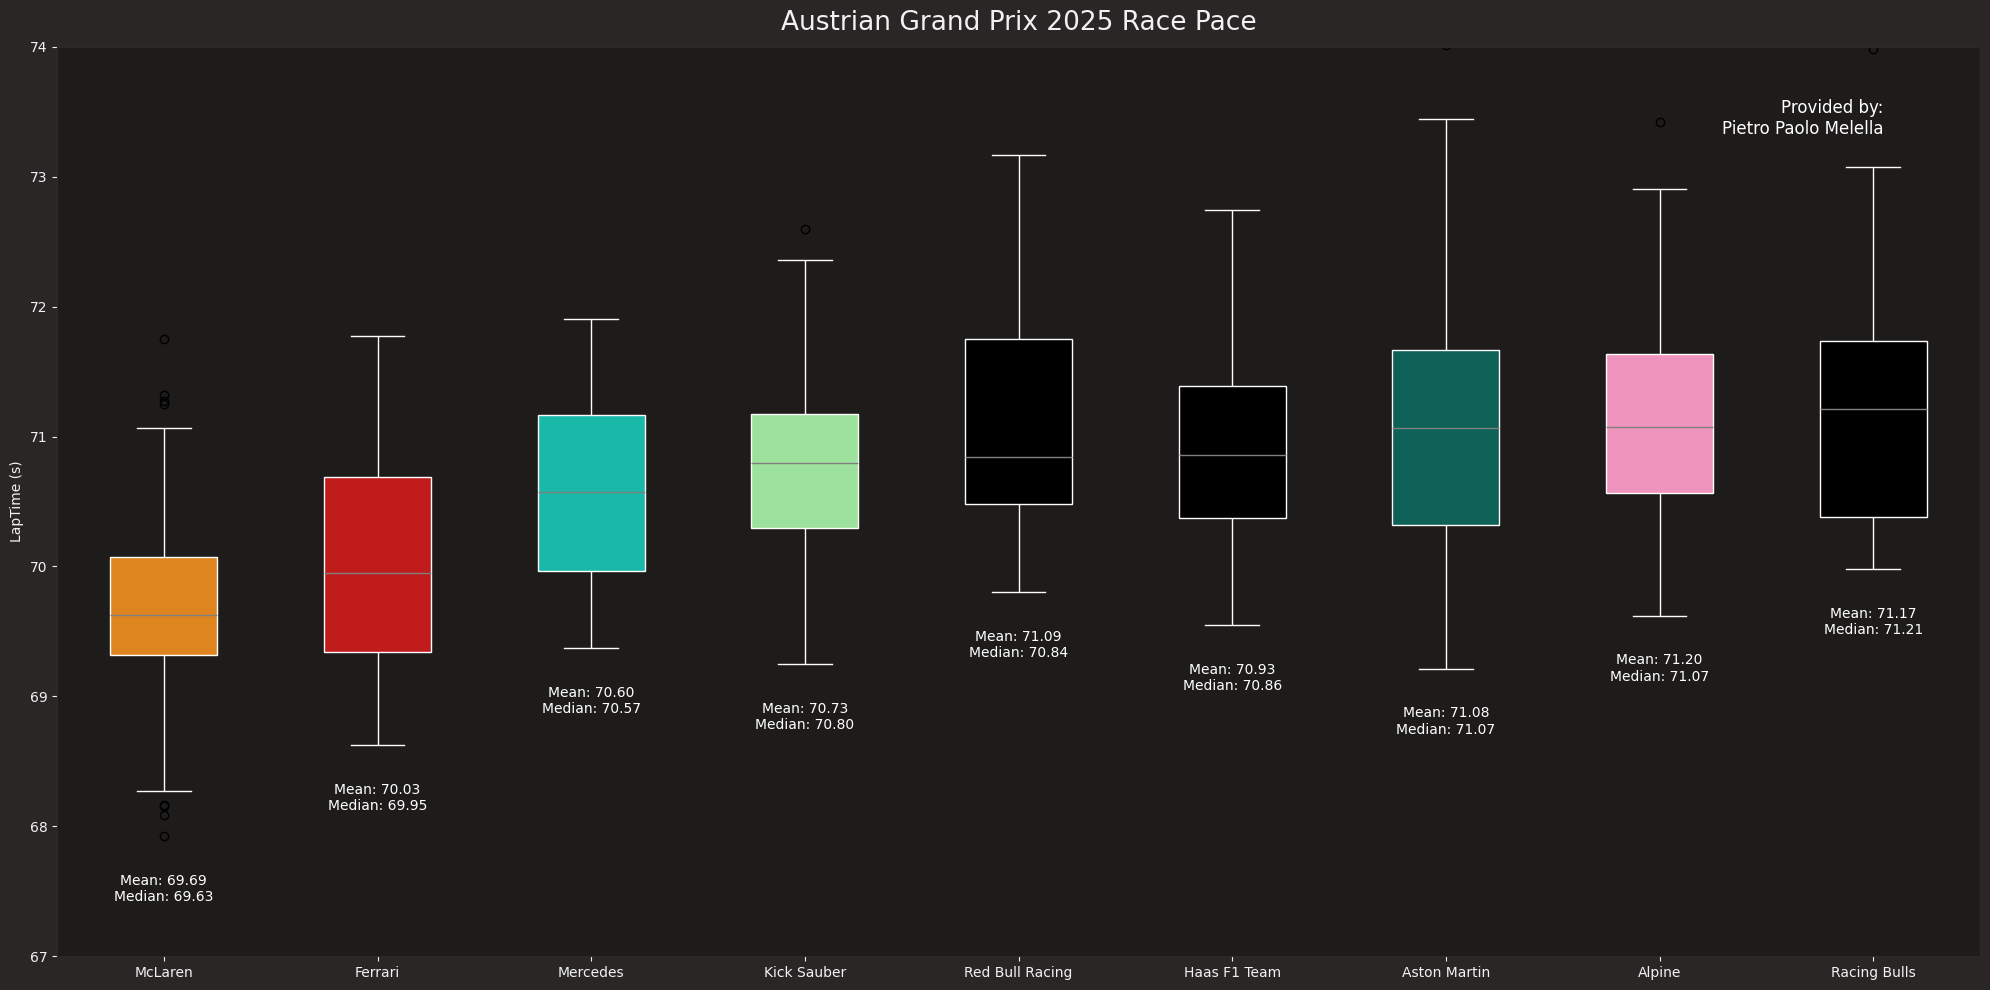

In [10]:
# First, calculate the mean and median times for each team
transformed_laps.reset_index(drop=True, inplace=True)

team_stats = transformed_laps.groupby('Team')['LapTime (s)'].agg(['mean', 'median', 'min', 'max'])

fig, ax = plt.subplots(figsize=(20, 10))  # Increased figure size to accommodate wider boxes
sns.boxplot(
    data=transformed_laps,
    x="Team",
    y="LapTime (s)",
    hue="Team",
    order=team_order,
    palette=team_palette,
    whiskerprops=dict(color="white"),
    boxprops=dict(edgecolor="white"),
    medianprops=dict(color="grey"),
    capprops=dict(color="white"),
    width=0.5,  # Increased width value
    dodge=False  # Ensure that boxes are centered under each team name
)

# Set y-axis limit (based on data range, adjust accordingly)
ax.set_ylim(67, 74)  # Example range, adjust based on your data

# Loop through the teams and add mean and median text under each whisker
for i, team in enumerate(team_order):
    # Get the whisker positions (min or max depending on where you want to place the label)
    whisker_position = team_stats.loc[team, 'min']  # Adjust to 'max' if you want the label under the upper whisker

    mean_time = team_stats.loc[team, 'mean']
    median_time = team_stats.loc[team, 'median']

    # Place the text slightly below the whisker (min value in this case), adjust y-position
    ax.text(
        i, whisker_position - 0.5,  # Adjust the y position slightly below the whisker
        f'Mean: {mean_time:.2f}\nMedian: {median_time:.2f}',
        horizontalalignment='center', color='white', fontsize=10
    )

# Update plot title and remove grid
plt.title(f"{session.event['EventName']} {session.event.year} Race Pace")
plt.grid(visible=False)

# Add source text in a more readable position
plt.text(
    0.95, 0.9, 'Provided by:\nPietro Paolo Melella',
    verticalalignment='bottom', horizontalalignment='right',
    transform=plt.gca().transAxes,
    color='white', fontsize=12
)

# Remove redundant x-label
ax.set(xlabel=None)

# Tight layout and display
plt.tight_layout()
plt.show()

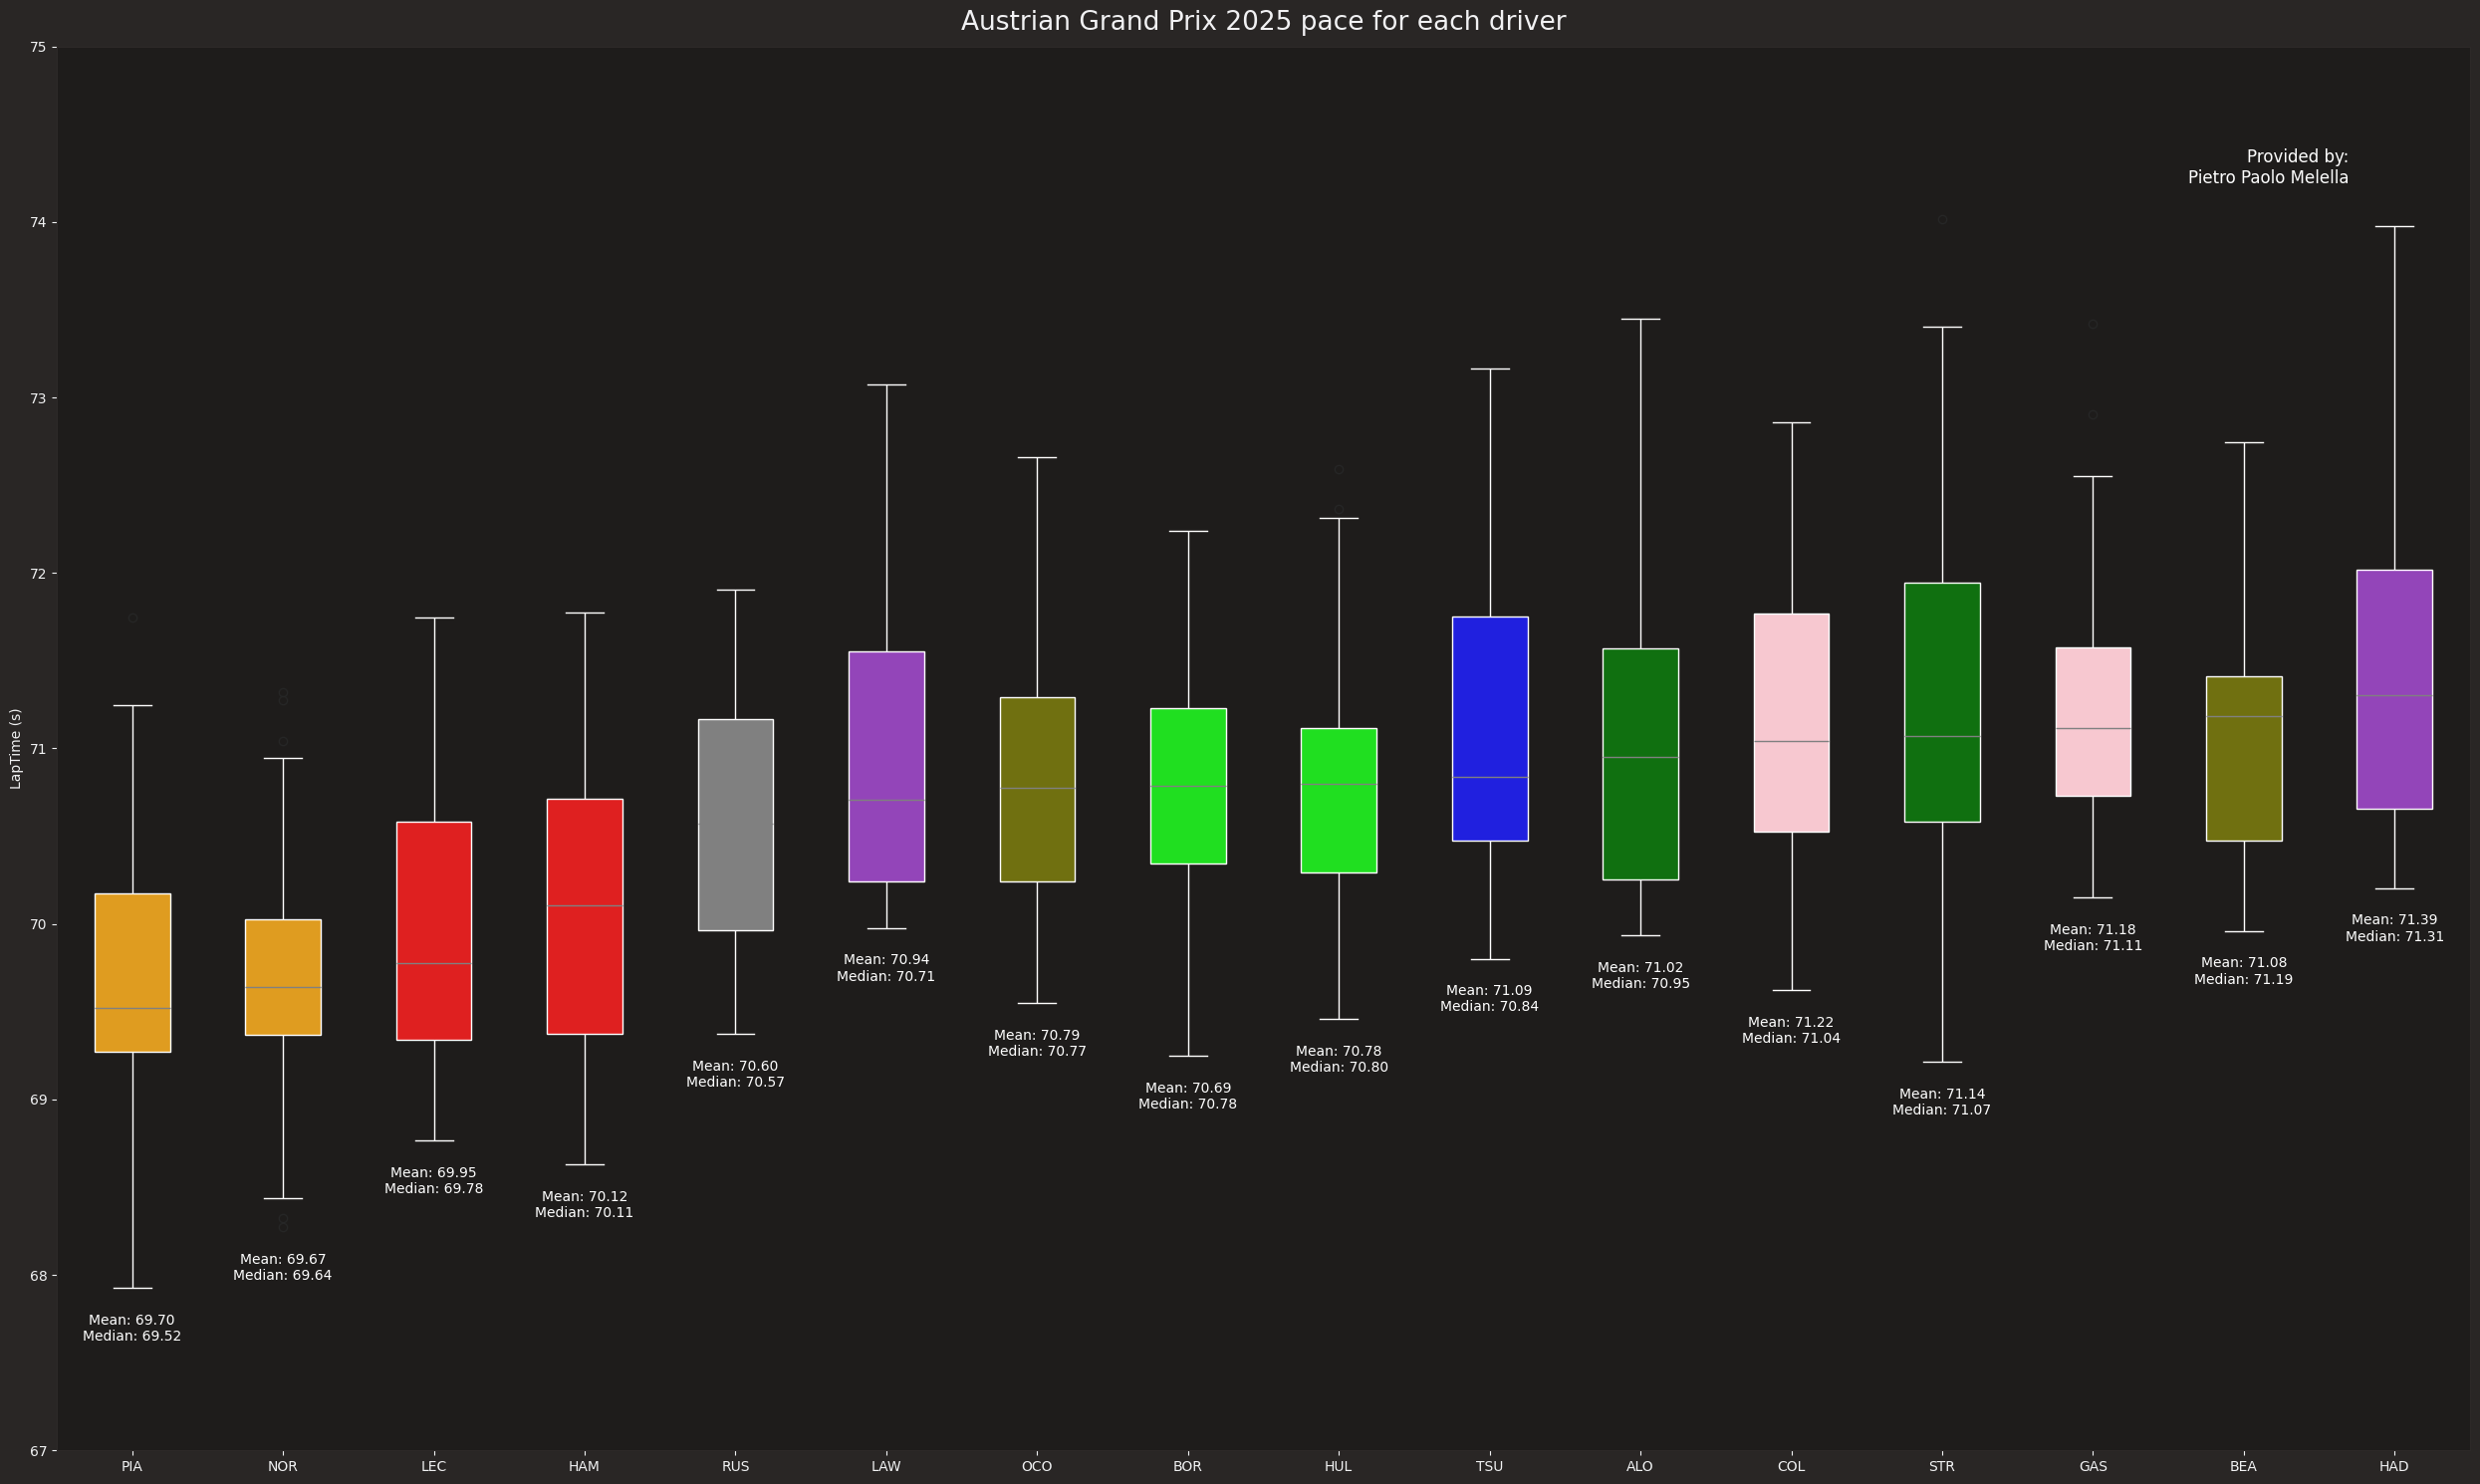

In [11]:
drivers_stats = transformed_laps.groupby('Driver')['LapTime (s)'].agg(['mean', 'median', 'min', 'max'])

median_lap_times = drivers_stats['median']

# Sort the drivers based on the median lap times
sorted_drivers = median_lap_times.sort_values().index

fig, ax = plt.subplots(figsize=(25, 15))  # Increased figure size to accommodate wider boxes
sns.boxplot(
    data=transformed_laps,
    x="Driver",
    y="LapTime (s)",
    hue="Driver",  # Assigning the `x` variable to `hue`
    palette=colors,
    order=sorted_drivers,
    whiskerprops=dict(color="white"),
    boxprops=dict(edgecolor="white"),
    medianprops=dict(color="grey"),
    capprops=dict(color="white"),
    width=0.5,  # Increased width value
    dodge=False,  # Ensure that boxes are centered under each team name
    legend=False  # Disable the legend to avoid redundancy
)


# Loop through the teams and add mean and median text under each whisker
for i, drivers in enumerate(sorted_drivers):
    # Get the whisker positions (min or max depending on where you want to place the label)
    whisker_position = drivers_stats.loc[drivers, 'min']  # Adjust to 'max' if you want the label under the upper whisker

    mean_time = drivers_stats.loc[drivers, 'mean']
    median_time = drivers_stats.loc[drivers, 'median']

    # Place the text slightly below the whisker (min value in this case), adjust y-position
    ax.text(
        i, whisker_position - 0.3,  # Adjust the y position slightly below the whisker
        f'Mean: {mean_time:.2f}\nMedian: {median_time:.2f}',
        horizontalalignment='center', color='white', fontsize=10
    )


plt.title(f"{session.event['EventName']} {session.event.year} pace for each driver")
plt.grid(visible=False)

plt.text(
    0.95, 0.9, 'Provided by:\nPietro Paolo Melella',
    verticalalignment='bottom', horizontalalignment='right',
    transform=plt.gca().transAxes,
    color='White', fontsize=12
)

# Set y-axis limit (based on data range, adjust accordingly)
ax.set_ylim(67,75)  # Example range, adjust based on your data
# x-label is redundant
ax.set(xlabel=None)
plt.tight_layout()
plt.show()

### 🏎️ Driver Pace by Stint

This script creates boxplots of lap times per driver for a given stint, sorted by median lap time.  
Under each lower whisker, it annotates the driver’s mean and median lap times for quick comparison.  

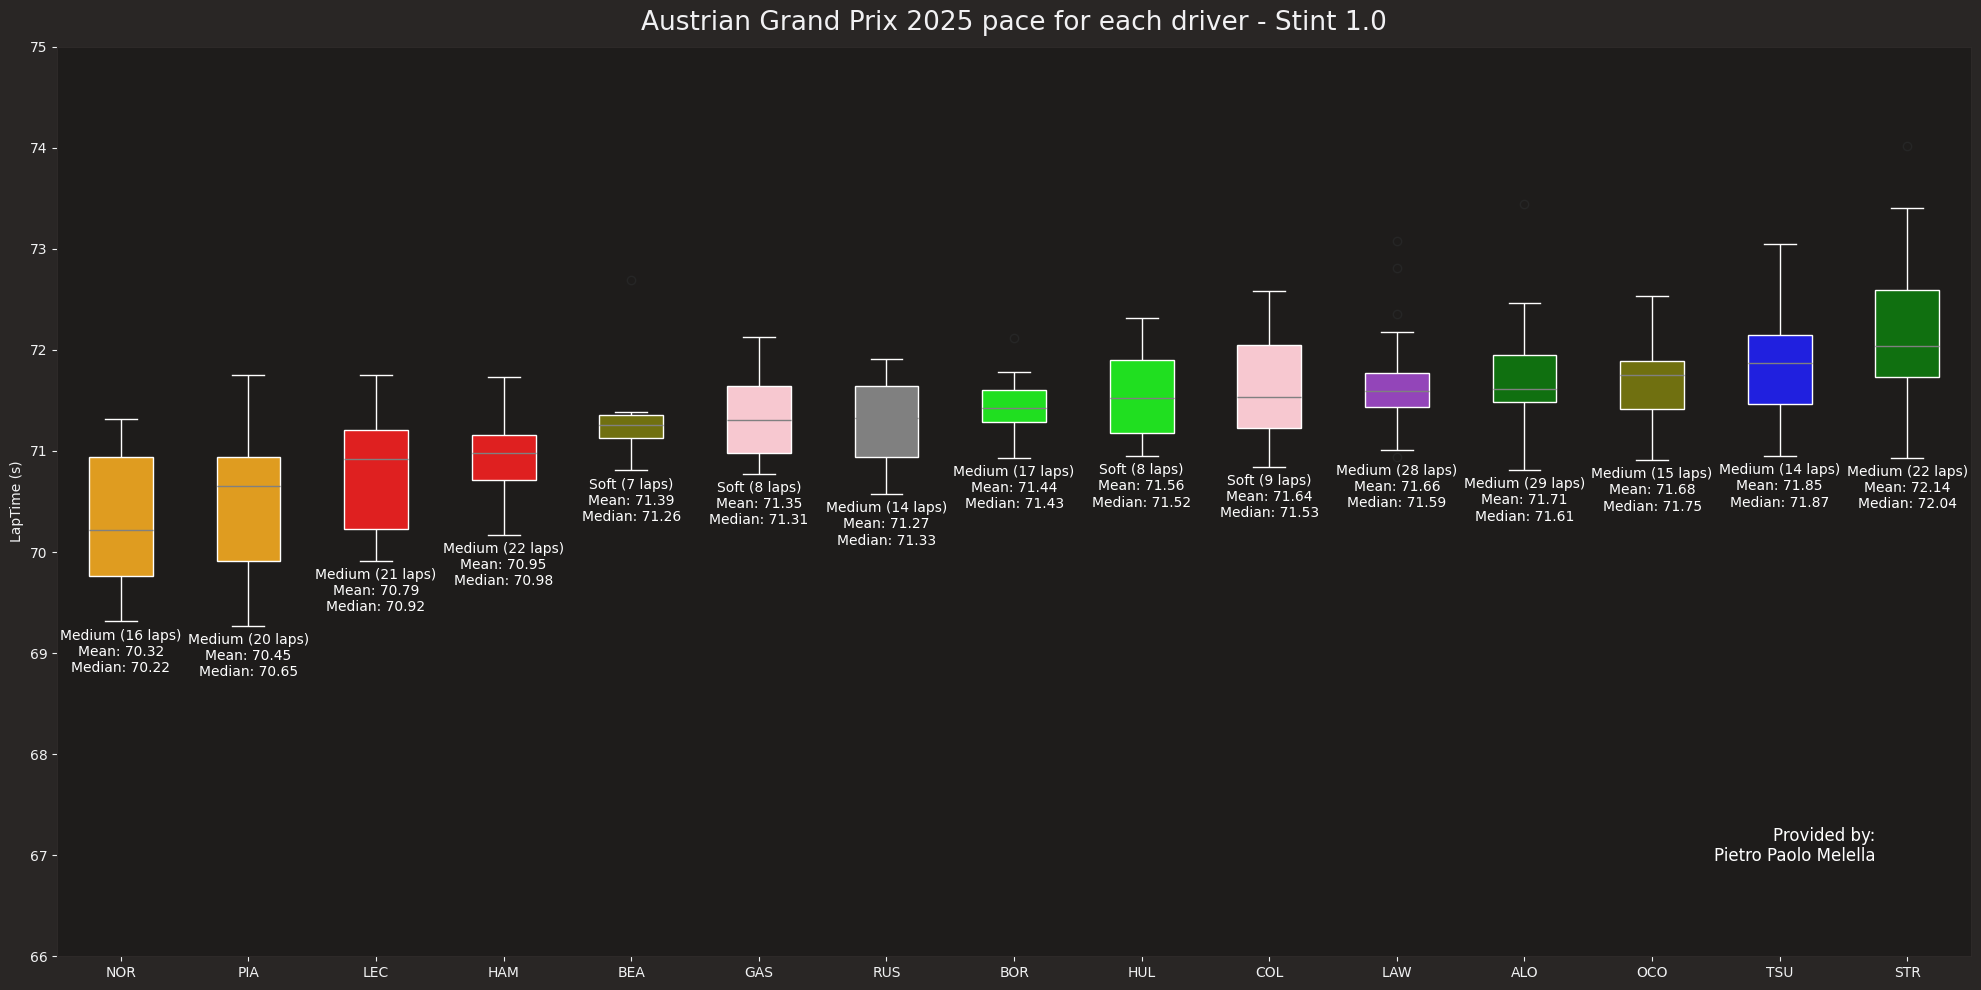

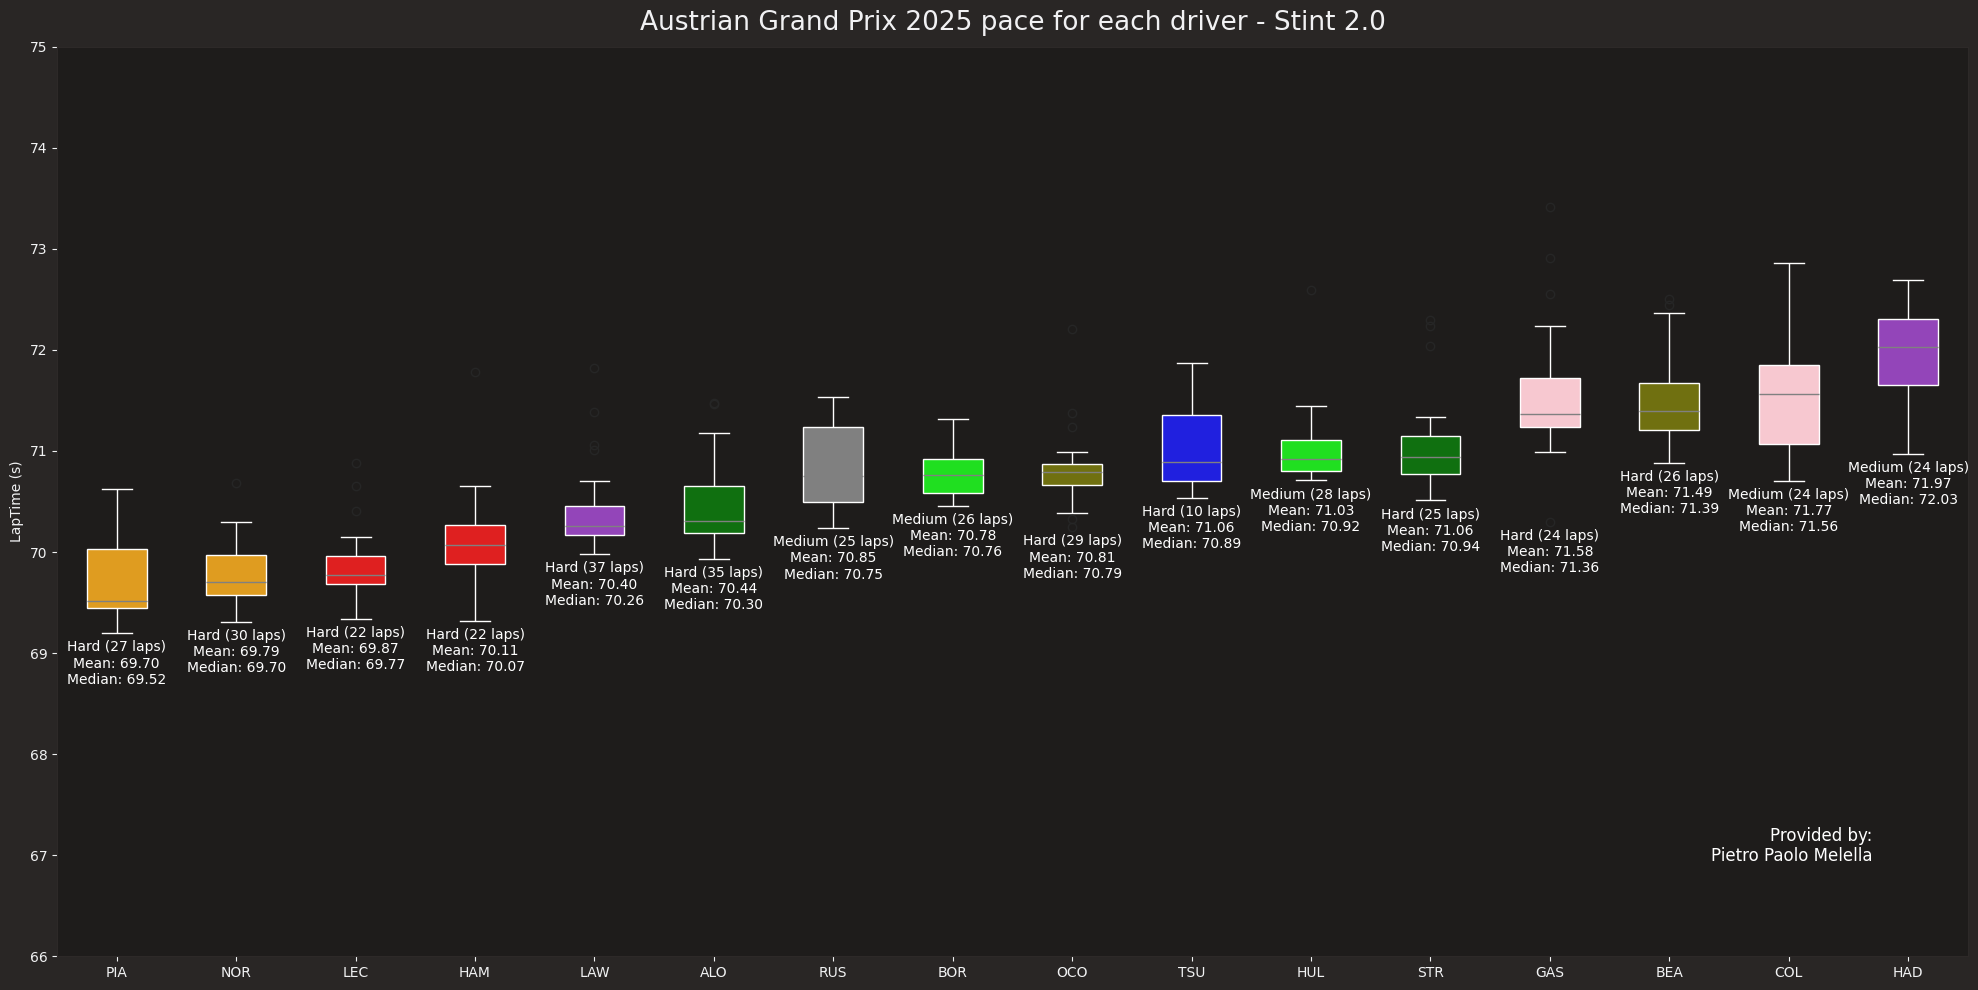

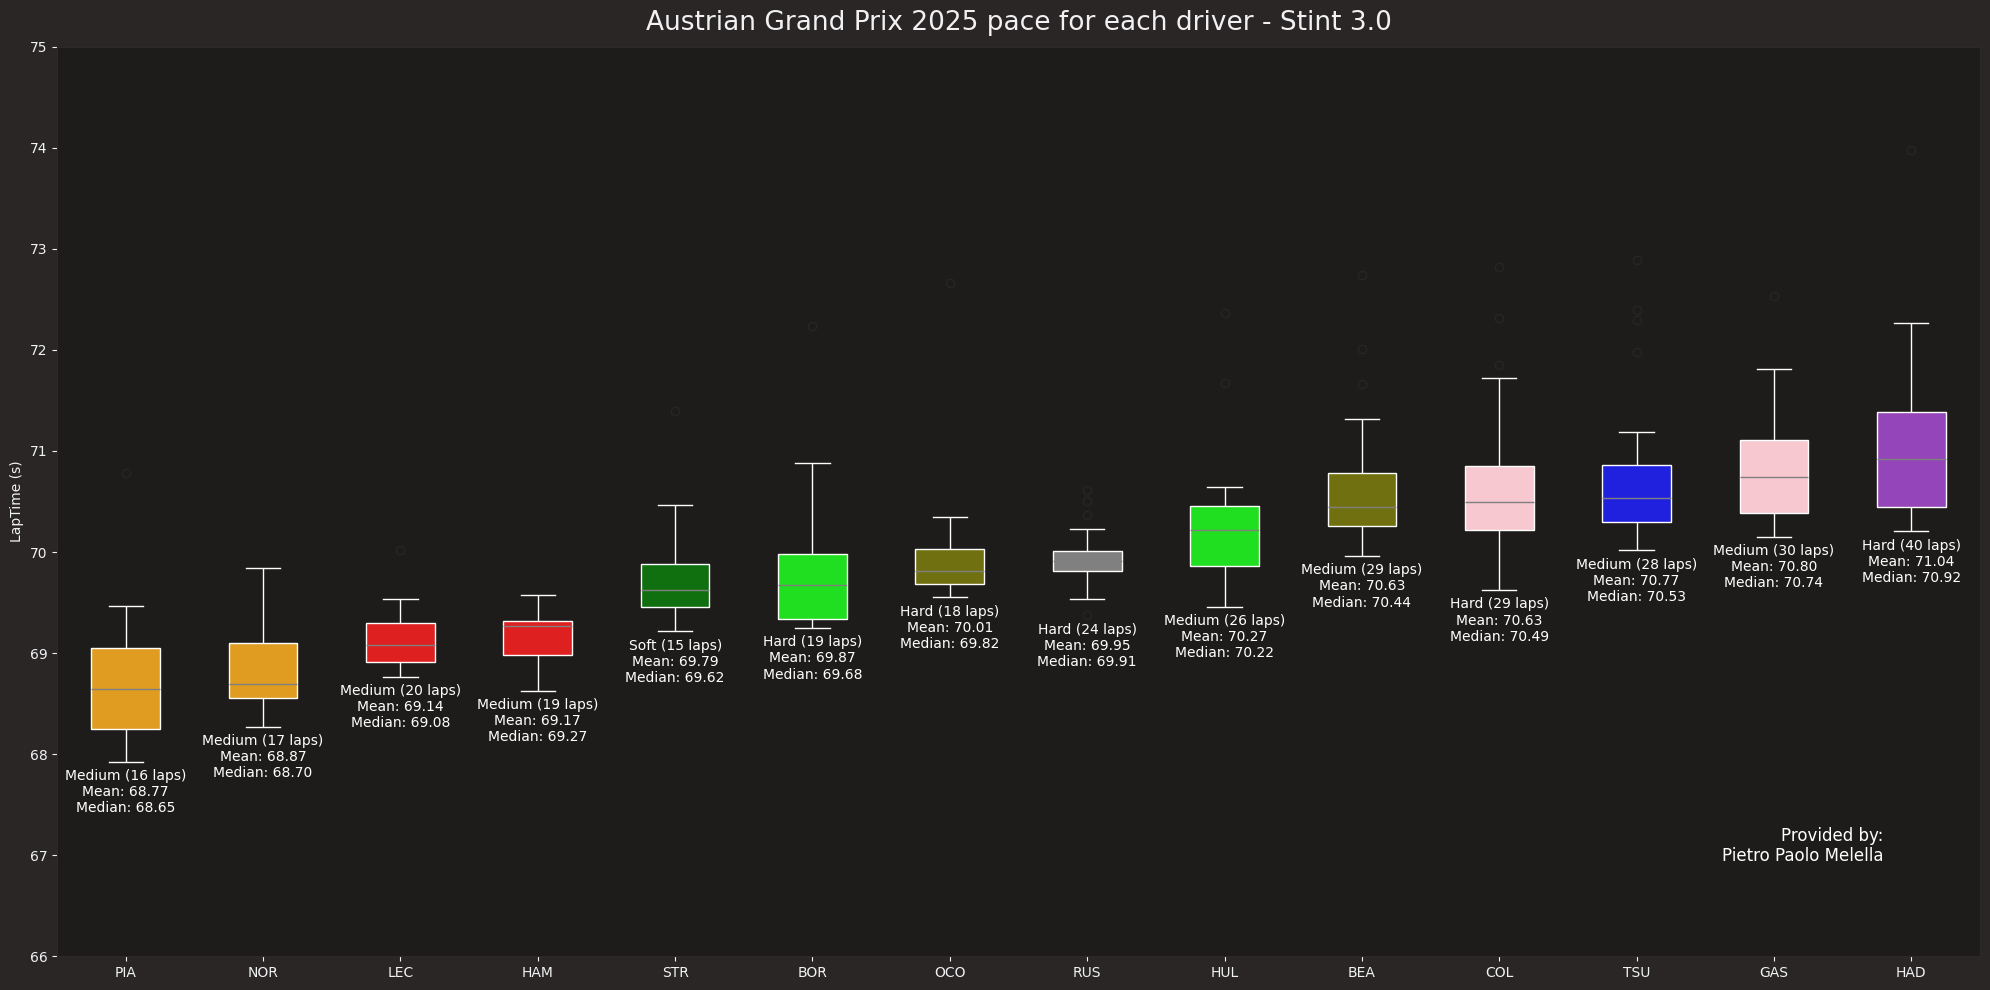

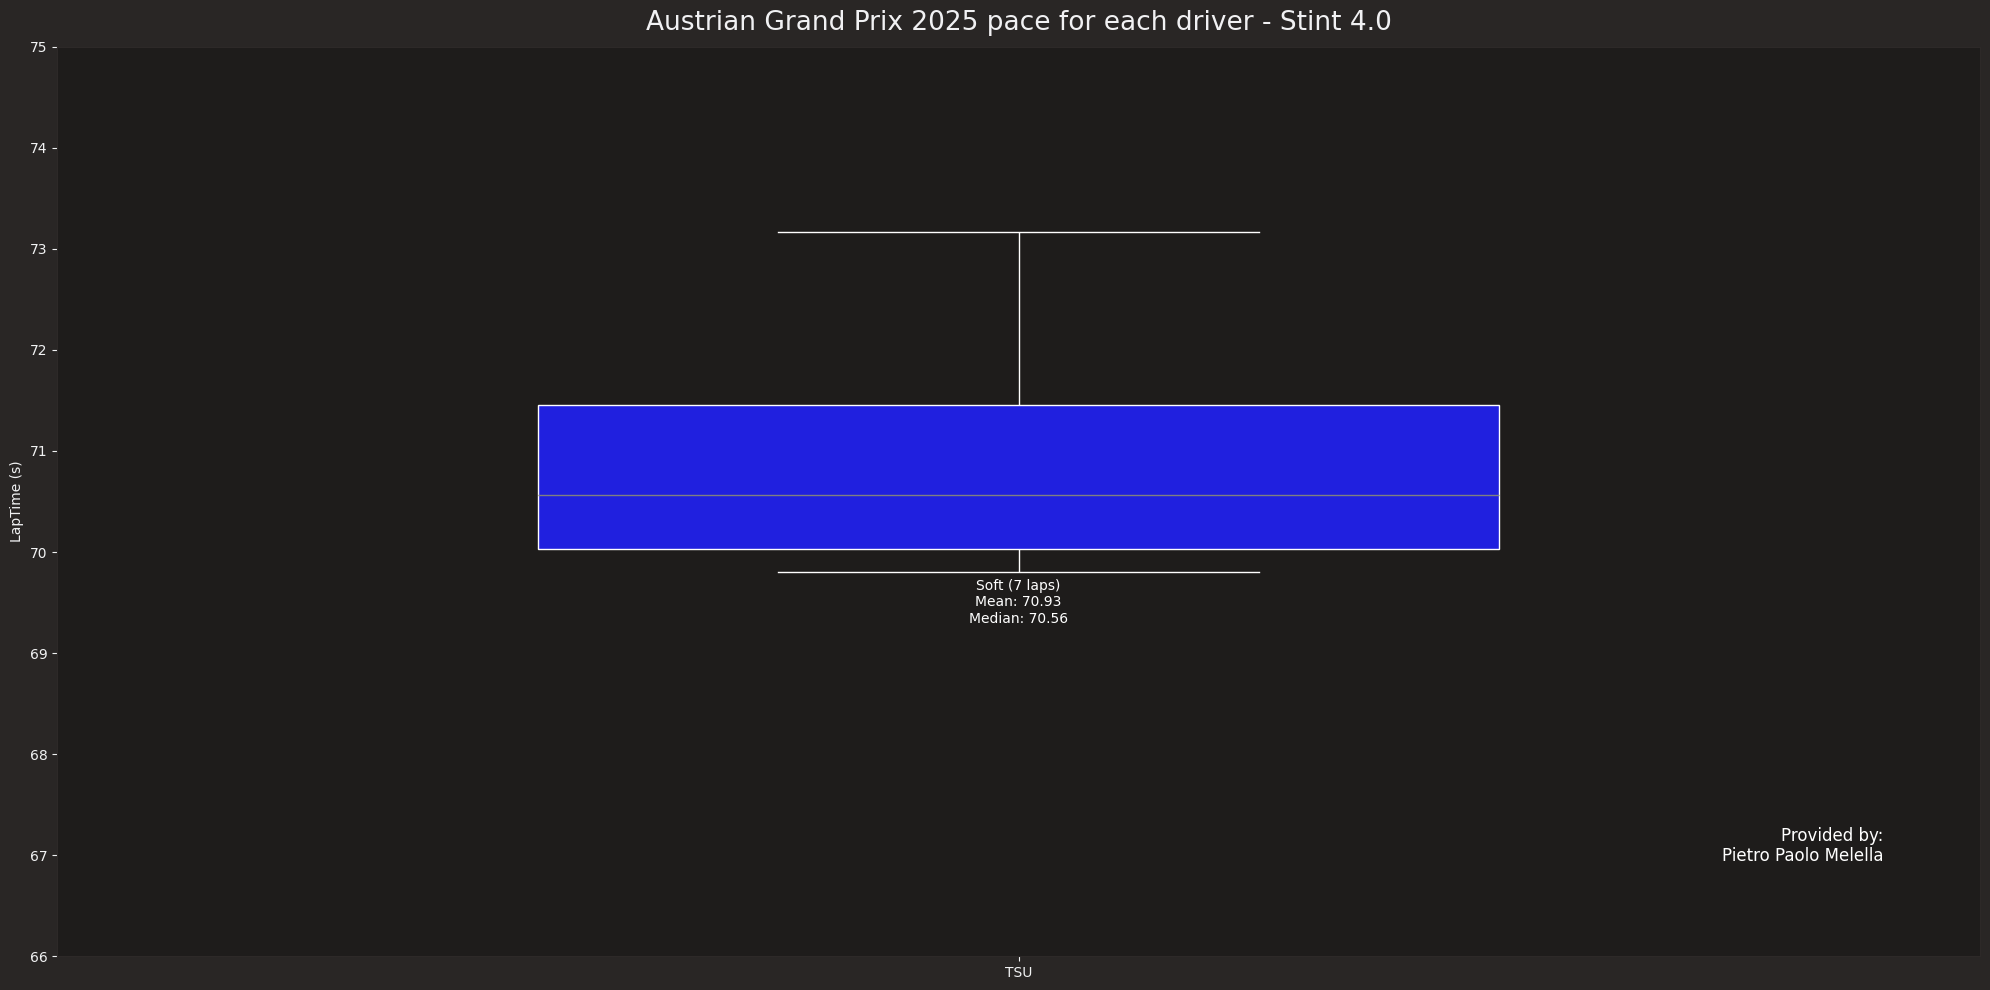

In [12]:
def plot_lap_times_for_stint_with_driver_stats(stint, transformed_laps, colors):
    # 1) Filter for the specific stint
    laps_with_stint = transformed_laps[transformed_laps['Stint'] == stint].copy()
    laps_with_stint.reset_index(drop=True, inplace=True)

    # Normalize compound names to Title case
    laps_with_stint['Compound'] = laps_with_stint['Compound'].str.title()

    # 2) Compute median lap time per driver, then sort drivers by that median
    median_lap_times = laps_with_stint.groupby('Driver')['LapTime (s)'].median()
    sorted_drivers = median_lap_times.sort_values().index

    # 3) Create the boxplot
    fig, ax = plt.subplots(figsize=(20, 10))
    sns.boxplot(
        data=laps_with_stint,
        x="Driver",
        y="LapTime (s)",
        hue="Driver",
        palette=colors,
        order=sorted_drivers,
        whiskerprops=dict(color="white"),
        boxprops=dict(edgecolor="white"),
        medianprops=dict(color="grey"),
        capprops=dict(color="white"),
        width=0.5,
        dodge=False,
        legend=False
    )

    # 4) Compute driver_stats (mean, median, min(LapTime) for annotation)
    driver_stats = laps_with_stint.groupby('Driver')['LapTime (s)'].agg(['mean', 'median', 'min'])
    
    # 5) Get compound per driver
    driver_compound = laps_with_stint.groupby('Driver')['Compound'].first()

    # 6) Get number of laps per driver
    driver_laps = laps_with_stint.groupby('Driver')['LapTime (s)'].count()

    # 7) Annotate
    for i, driver in enumerate(sorted_drivers):
        whisker_position = driver_stats.loc[driver, 'min']
        mean_time = driver_stats.loc[driver, 'mean']
        median_time = driver_stats.loc[driver, 'median']
        compound = driver_compound[driver]
        num_laps = driver_laps[driver]

        ax.text(
            i, whisker_position - 0.5,
            f'{compound} ({num_laps} laps)\nMean: {mean_time:.2f}\nMedian: {median_time:.2f}',
            horizontalalignment='center',
            color='white',
            fontsize=10
        )

    # 8) Add attribution, title, grid, and axis tweaks
    plt.text(
        0.95, 0.1, 'Provided by:\nPietro Paolo Melella',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='white', fontsize=12
    )
    plt.title(f"{session.event['EventName']} {session.event.year} pace for each driver - Stint {stint}")
    plt.grid(visible=False)
    ax.set(xlabel=None)
    ax.set_ylim(66, 75)  # adjust if your LapTime range is different
    plt.tight_layout()
    plt.show()

# Loop over each unique stint and plot
for stint in sorted(transformed_laps['Stint'].unique()):
    plot_lap_times_for_stint_with_driver_stats(stint, transformed_laps, colors)

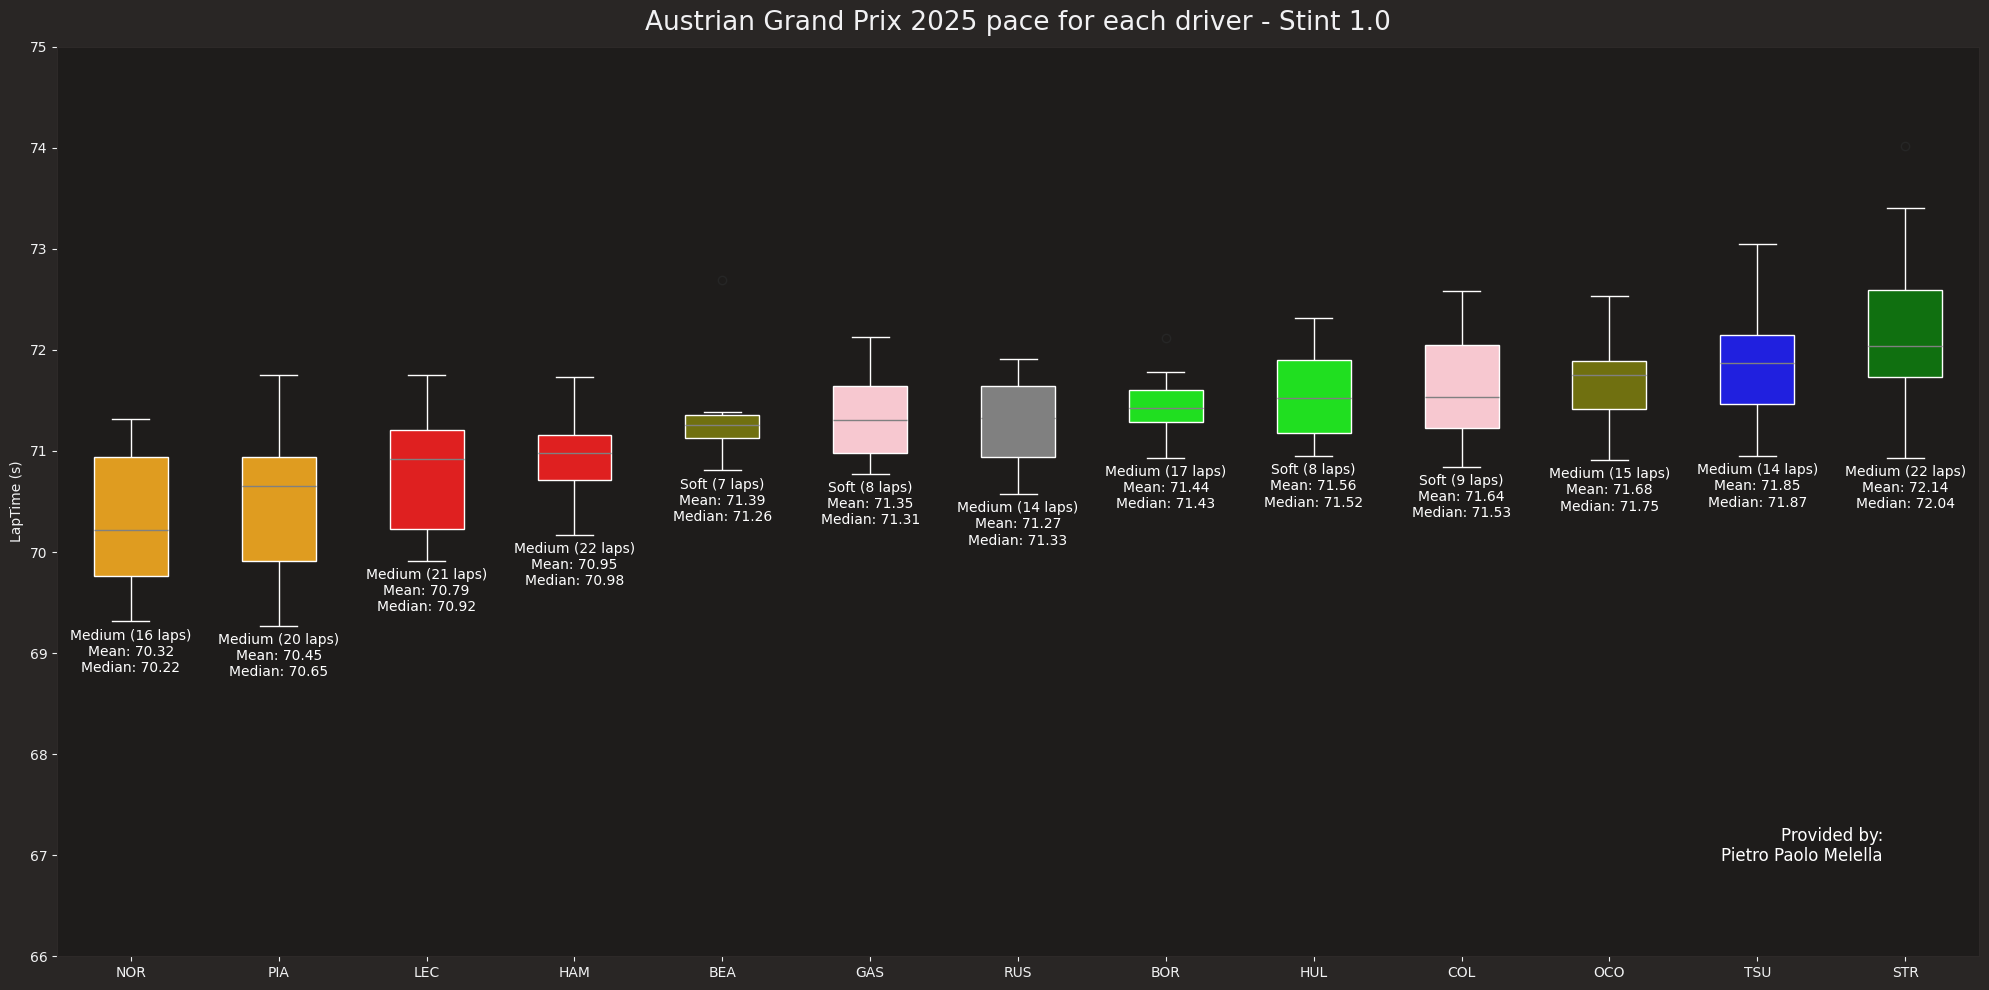

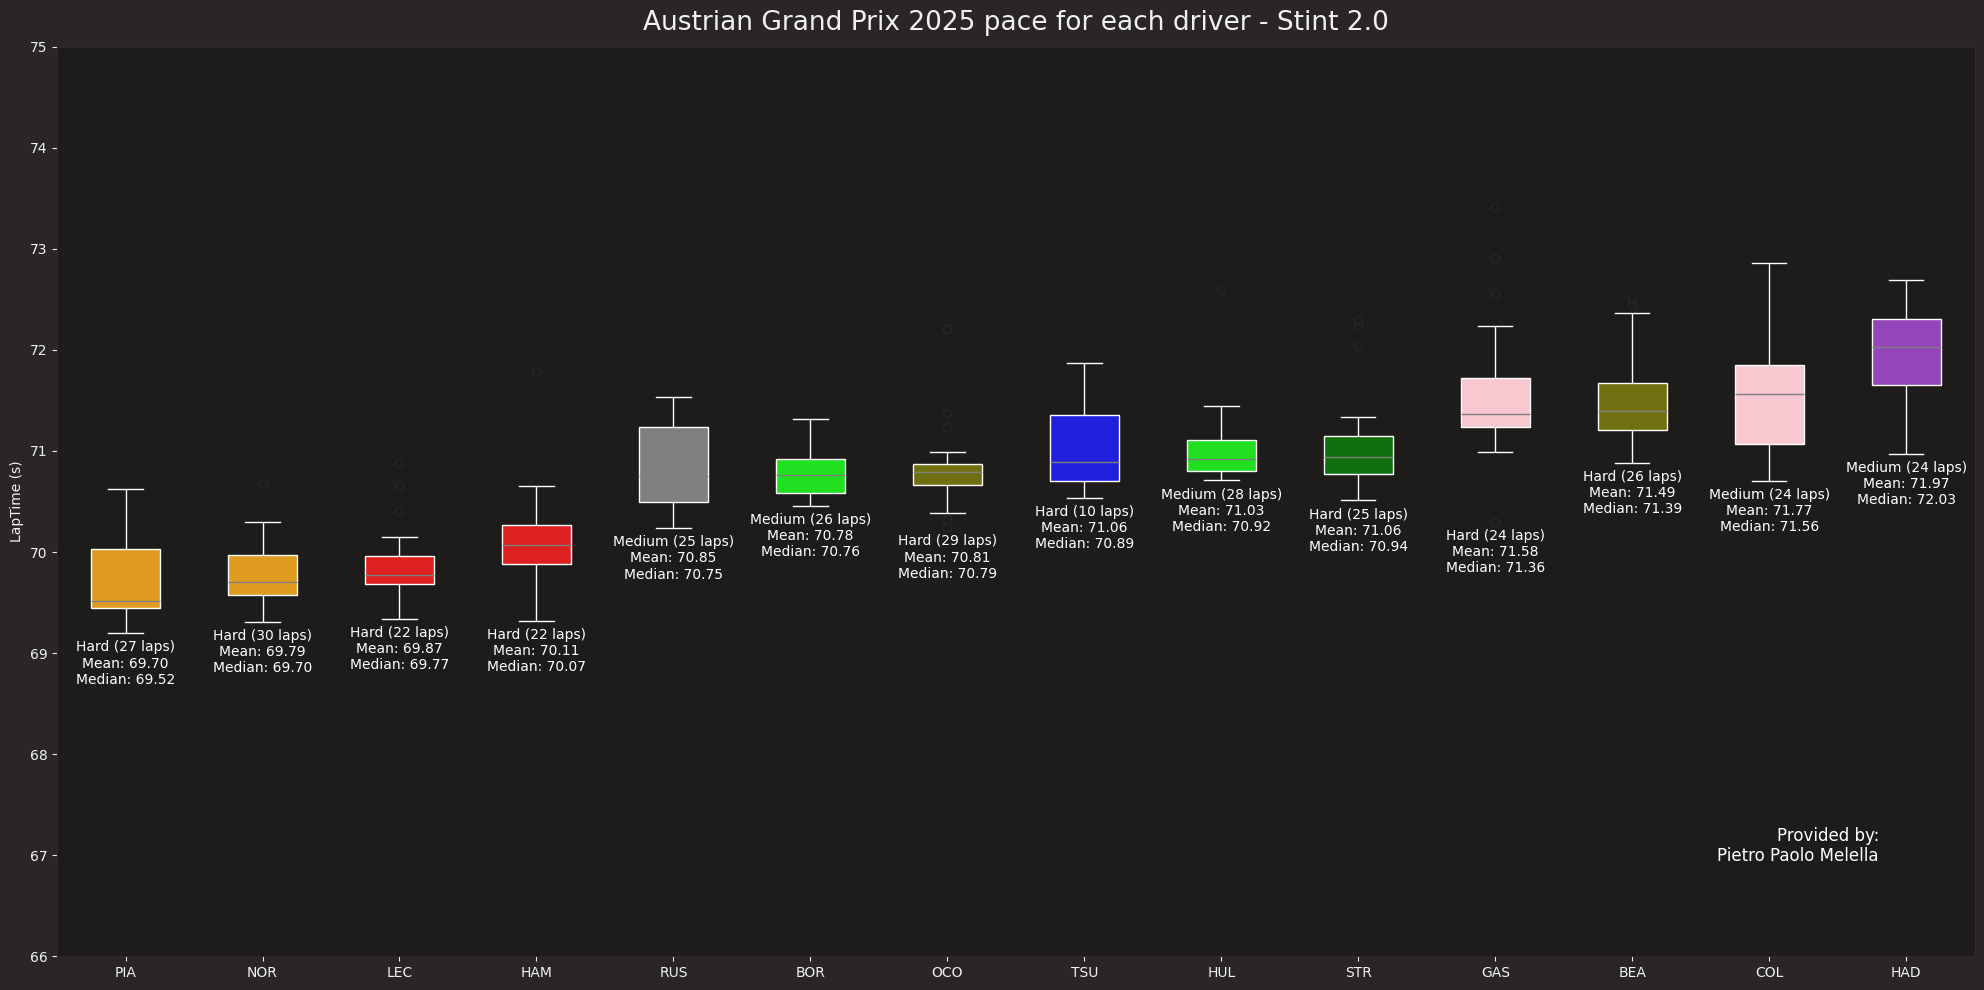

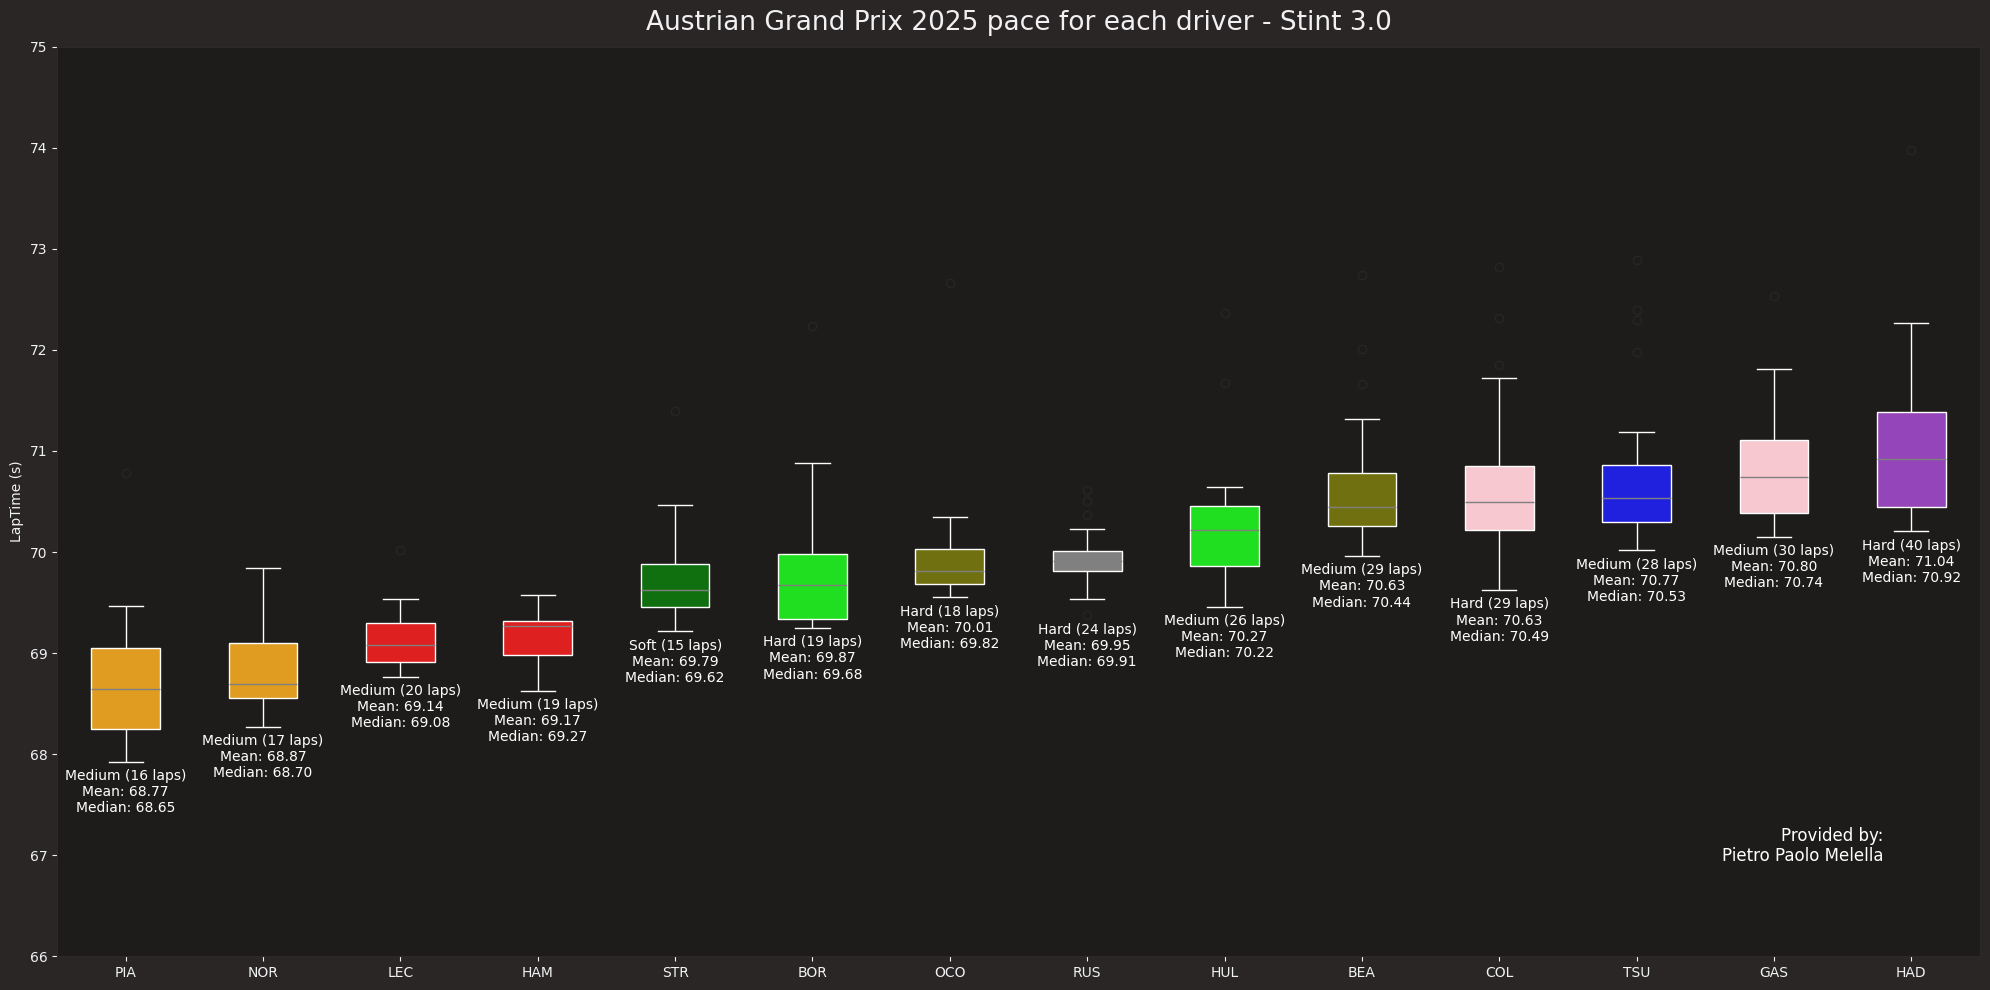

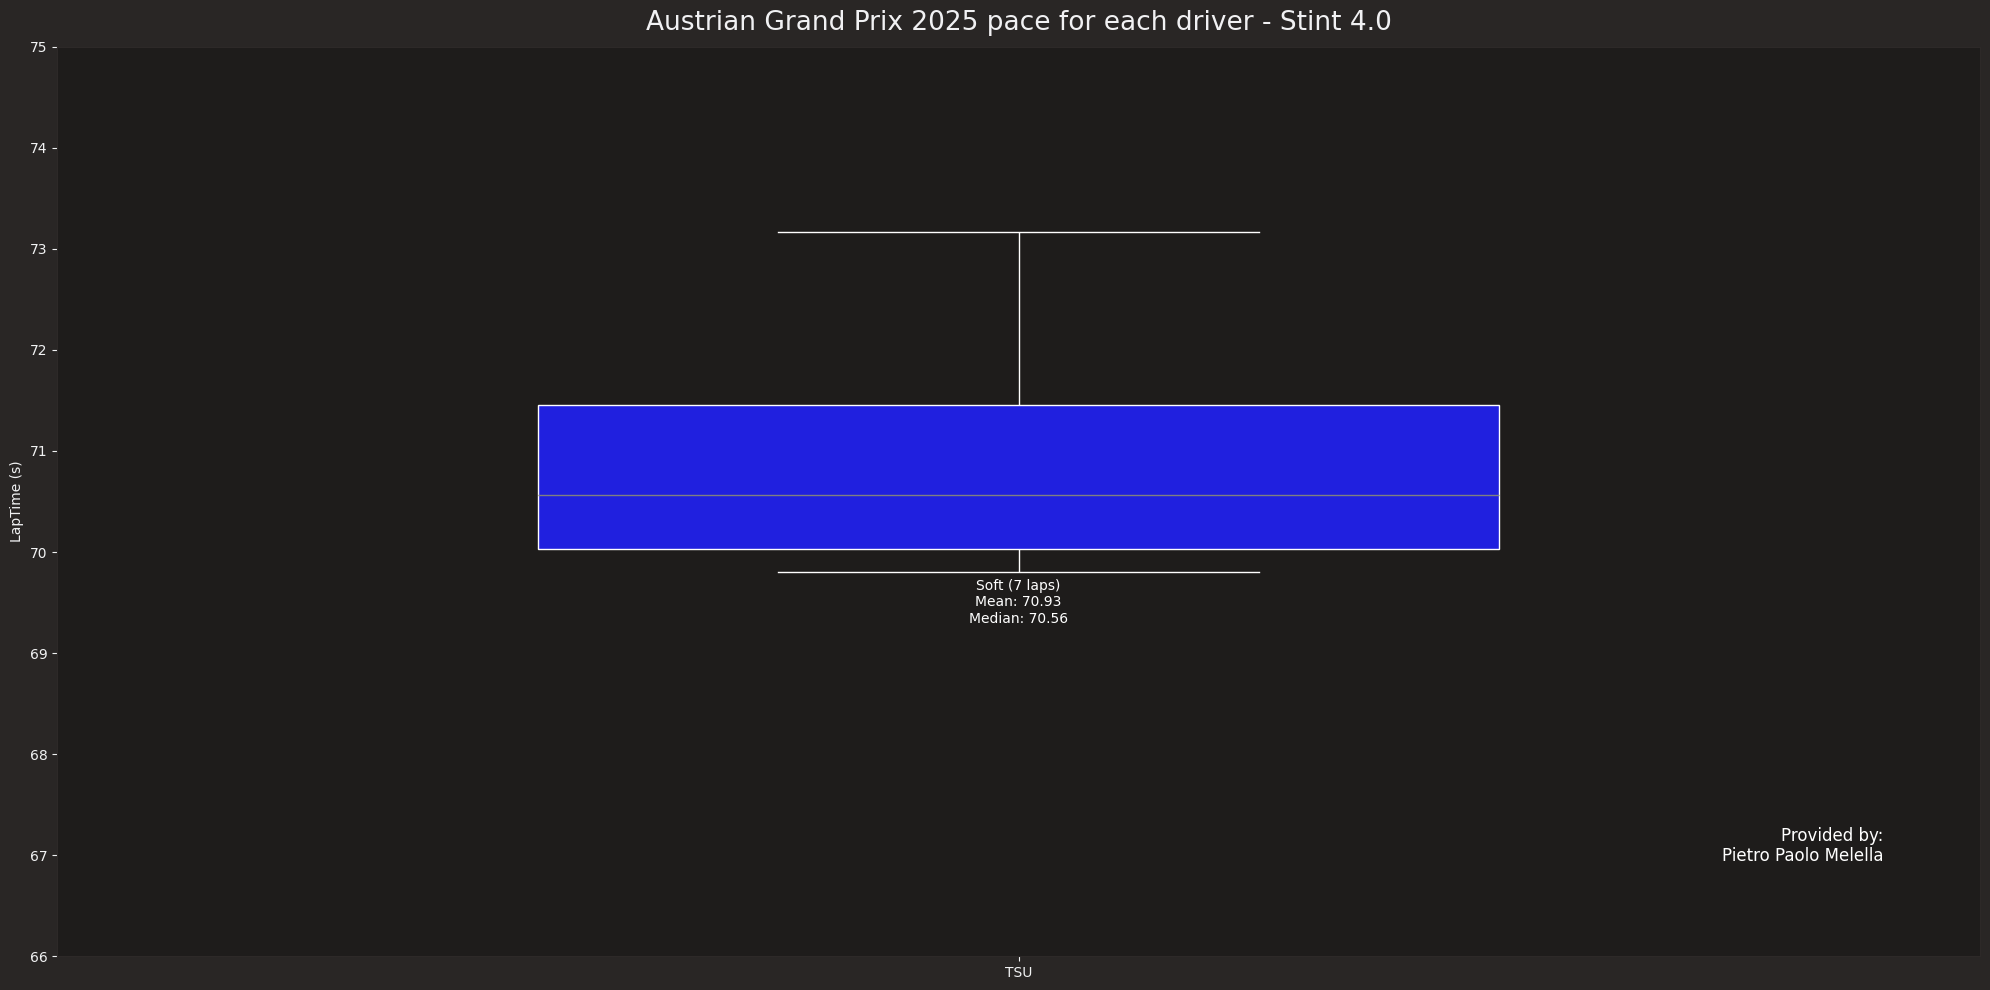

In [13]:
third_stint = transformed_laps[transformed_laps['Stint'] == 3].copy()
pilots_2_stops =third_stint['Driver'].unique()

filtered_df_2_stops = transformed_laps[transformed_laps['Driver'].isin(pilots_2_stops)].copy()


# Example: loop over each unique stint and plot
for stint in sorted(filtered_df_2_stops['Stint'].unique()):
    plot_lap_times_for_stint_with_driver_stats(stint, filtered_df_2_stops, colors)


### 🕒 Average Gap to Fastest Driver

Here we measure each driver’s average gap (in seconds) to the fastest driver over the race.  
This gives a normalized view of performance, independent of just best laps.  
It helps highlight sustained race pace differences and exposes whether someone was consistently close to the front or significantly off-pace.

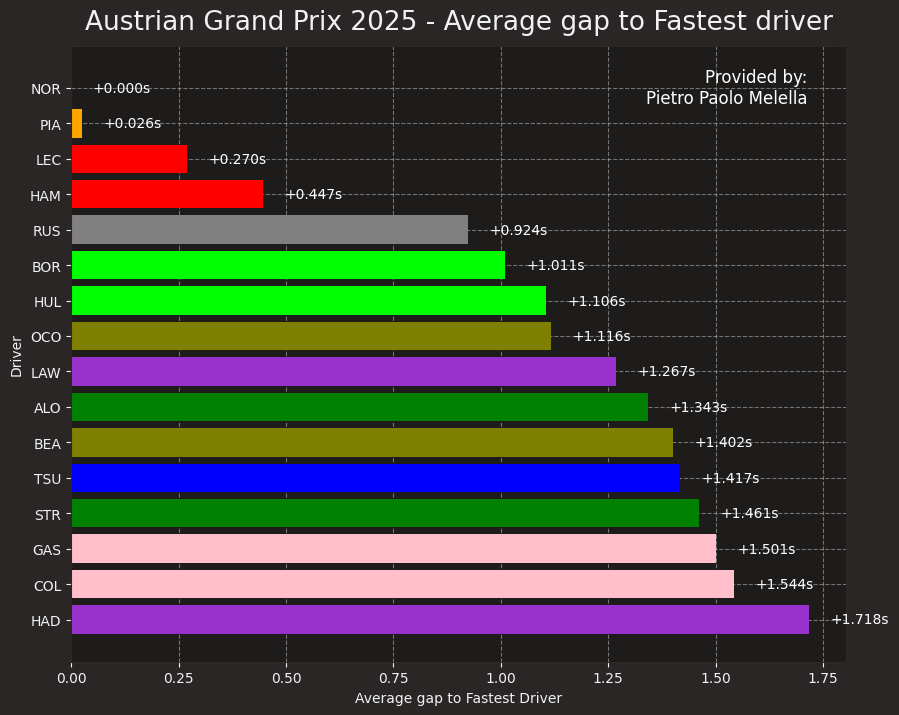

In [14]:
mean_lap_times = transformed_laps.groupby('Driver')['LapTime (s)'].mean()

# Find the fastest lap time
fastest_lap_time = mean_lap_times.min()

# Compute the gap from the fastest lap time for each driver
gap_from_fastest = mean_lap_times - fastest_lap_time

# Sort the gap_from_fastest for better visualization (fastest to slowest)
gap_from_fastest = gap_from_fastest.sort_values(ascending=True)


# Plot the data
plt.figure(figsize=(10, 8))
bars = plt.barh(gap_from_fastest.index, gap_from_fastest.values, color=[colors[driver] for driver in gap_from_fastest.index])
plt.xlabel("Average gap to Fastest Driver")
plt.ylabel("Driver")
plt.title(f"{session.event['EventName']} {session.event.year} - Average gap to Fastest driver")

# Add mean lap times as text labels on the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.05, bar.get_y() + bar.get_height()/2, f'+{width:.3f}s',
             va='center', ha='left', color='white', fontsize=10)

plt.text(
    0.95, 0.9, 'Provided by:\nPietro Paolo Melella',
    verticalalignment='bottom', horizontalalignment='right',
    transform=plt.gca().transAxes,
    color='White', fontsize=12
)

plt.grid(True, linestyle='--', alpha=0.6)
plt.gca().invert_yaxis()  # To display the fastest on top
plt.show()

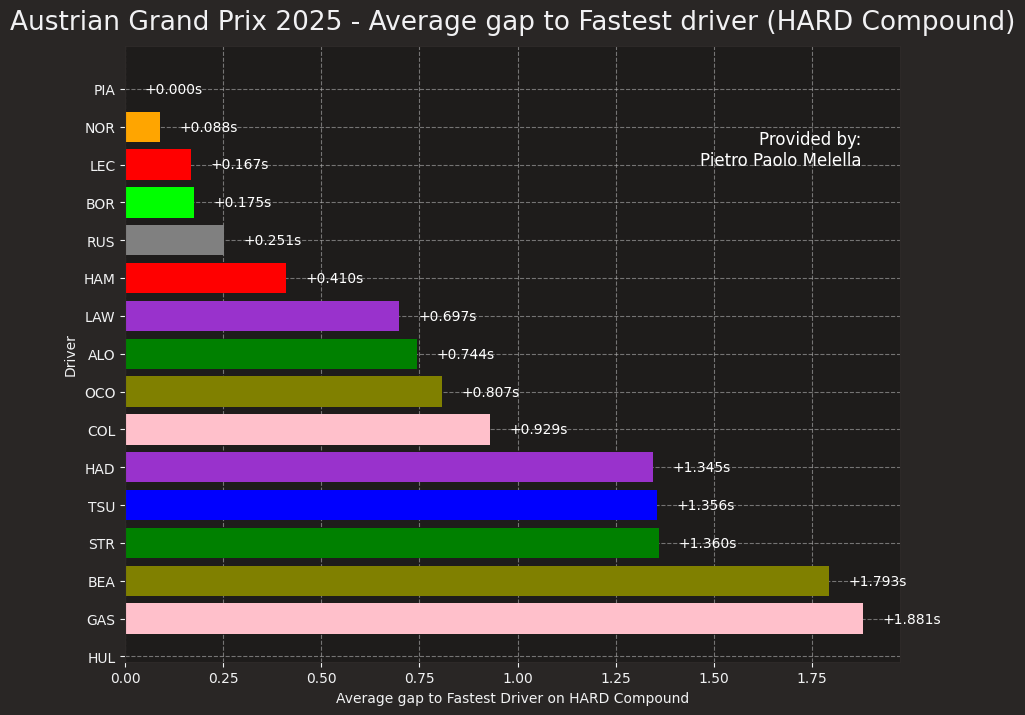

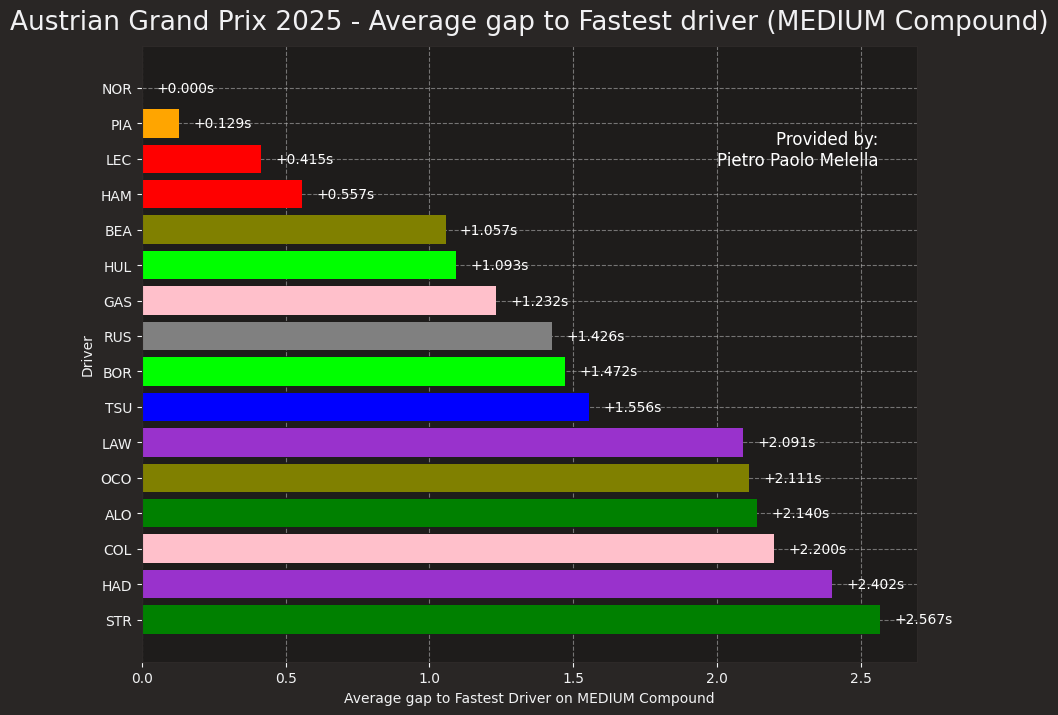

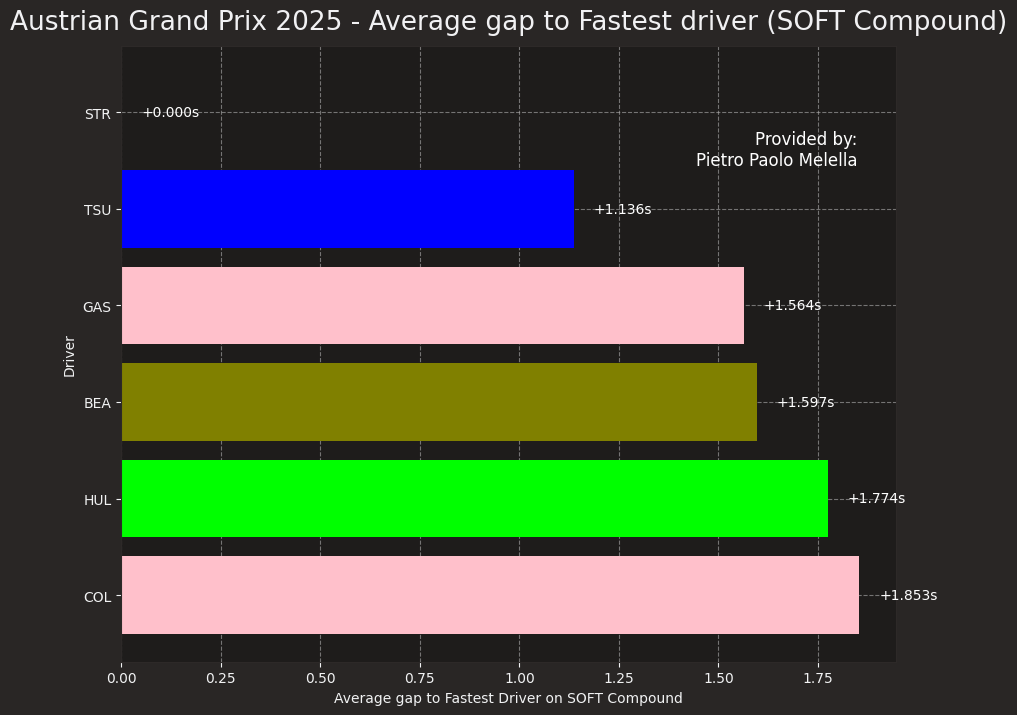

In [15]:
# Calculate mean lap times for each compound
mean_lap_times_per_compound = transformed_laps.groupby(['Driver', 'Compound'])['LapTime (s)'].mean().unstack()

# Iterate over each compound and create a separate plot
for compound in mean_lap_times_per_compound.columns:
    # Replace NaN values with a large number (indicating no lap times for that compound)
    mean_lap_times_per_compound[compound] = mean_lap_times_per_compound[compound].fillna(np.inf)

    # Find the fastest lap time for this compound (ignoring inf values)
    fastest_lap_time_compound = mean_lap_times_per_compound[compound][mean_lap_times_per_compound[compound] != np.inf].min()

    # Compute the gap from the fastest lap time for each driver (for this compound)
    gap_from_fastest_compound = mean_lap_times_per_compound[compound] - fastest_lap_time_compound

    # Sort the gaps for better visualization (fastest to slowest)
    gap_from_fastest_compound = gap_from_fastest_compound.sort_values(ascending=True)

    # Plot the data for this compound
    plt.figure(figsize=(10, 8))
    bars = plt.barh(gap_from_fastest_compound.index, gap_from_fastest_compound.values,
                    color=[colors[driver] for driver in gap_from_fastest_compound.index])
    plt.xlabel(f"Average gap to Fastest Driver on {compound} Compound")
    plt.ylabel("Driver")
    plt.title(f"{session.event['EventName']} {session.event.year} - Average gap to Fastest driver ({compound} Compound)")

    plt.text(
    0.95, 0.8, 'Provided by:\nPietro Paolo Melella',
    verticalalignment='bottom', horizontalalignment='right',
    transform=plt.gca().transAxes,
    color='White', fontsize=12
)

    # Add mean lap times as text labels on the bars
    for bar in bars:
        width = bar.get_width()
        if np.isfinite(width):  # Ensure we only try to plot finite values
            plt.text(width + 0.05, bar.get_y() + bar.get_height()/2, f'+{width:.3f}s',
                     va='center', ha='left', color='white', fontsize=10)

    plt.grid(True, linestyle='--', alpha=0.6)
    plt.gca().invert_yaxis()  # To display the fastest on top
    plt.show()

### 📊 Lap Time Consistency (Standard Deviation)

This analysis focuses on **consistency** by calculating the standard deviation of lap times for each driver.  
A lower standard deviation indicates smoother, more predictable performance — critical in race conditions for tyre management and strategy.  
Drivers with small variation often execute stints more efficiently, even if they aren’t the absolute fastest.

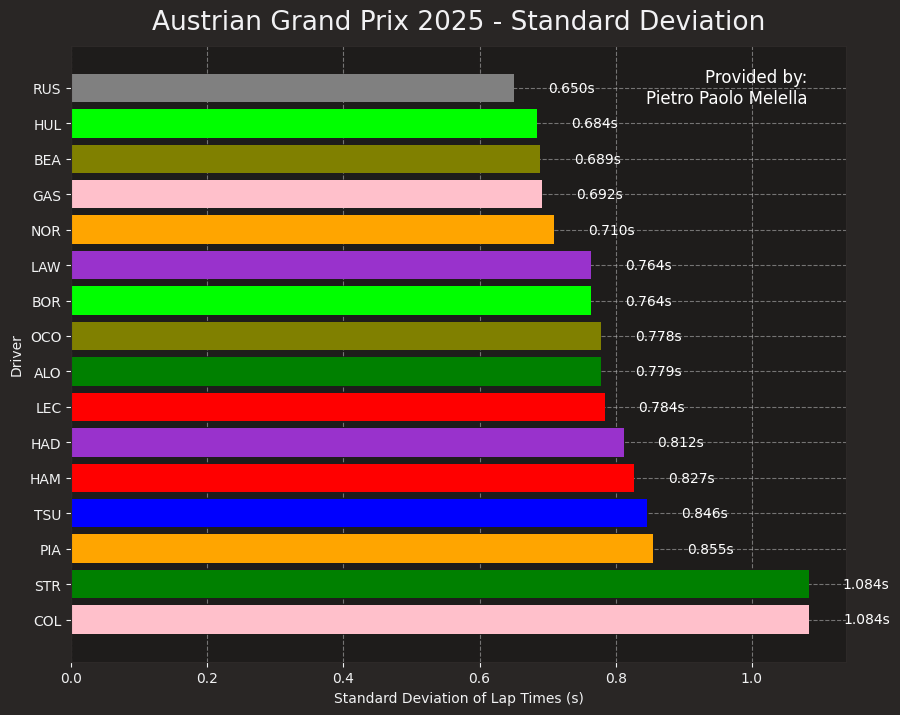

In [16]:
# Calculate the standard deviation of lap times for each driver
std_lap_times = transformed_laps.groupby('Driver')['LapTime (s)'].std()

# Sort the standard deviation values for better visualization (lowest to highest)
std_lap_times_sorted = std_lap_times.sort_values(ascending=True)

# Plot the data
plt.figure(figsize=(10, 8))
bars = plt.barh(std_lap_times_sorted.index, std_lap_times_sorted.values, 
                color=[colors[driver] for driver in std_lap_times_sorted.index])
plt.xlabel("Standard Deviation of Lap Times (s)")
plt.ylabel("Driver")
plt.title(f"{session.event['EventName']} {session.event.year} - Standard Deviation")

# Add standard deviation values as text labels on the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.05, bar.get_y() + bar.get_height()/2, f'{width:.3f}s',
             va='center', ha='left', color='white', fontsize=10)

plt.text(
    0.95, 0.9, 'Provided by:\nPietro Paolo Melella',
    verticalalignment='bottom', horizontalalignment='right',
    transform=plt.gca().transAxes,
    color='White', fontsize=12
)

plt.grid(True, linestyle='--', alpha=0.6)
plt.gca().invert_yaxis()  # To display the most consistent drivers on top
plt.show()

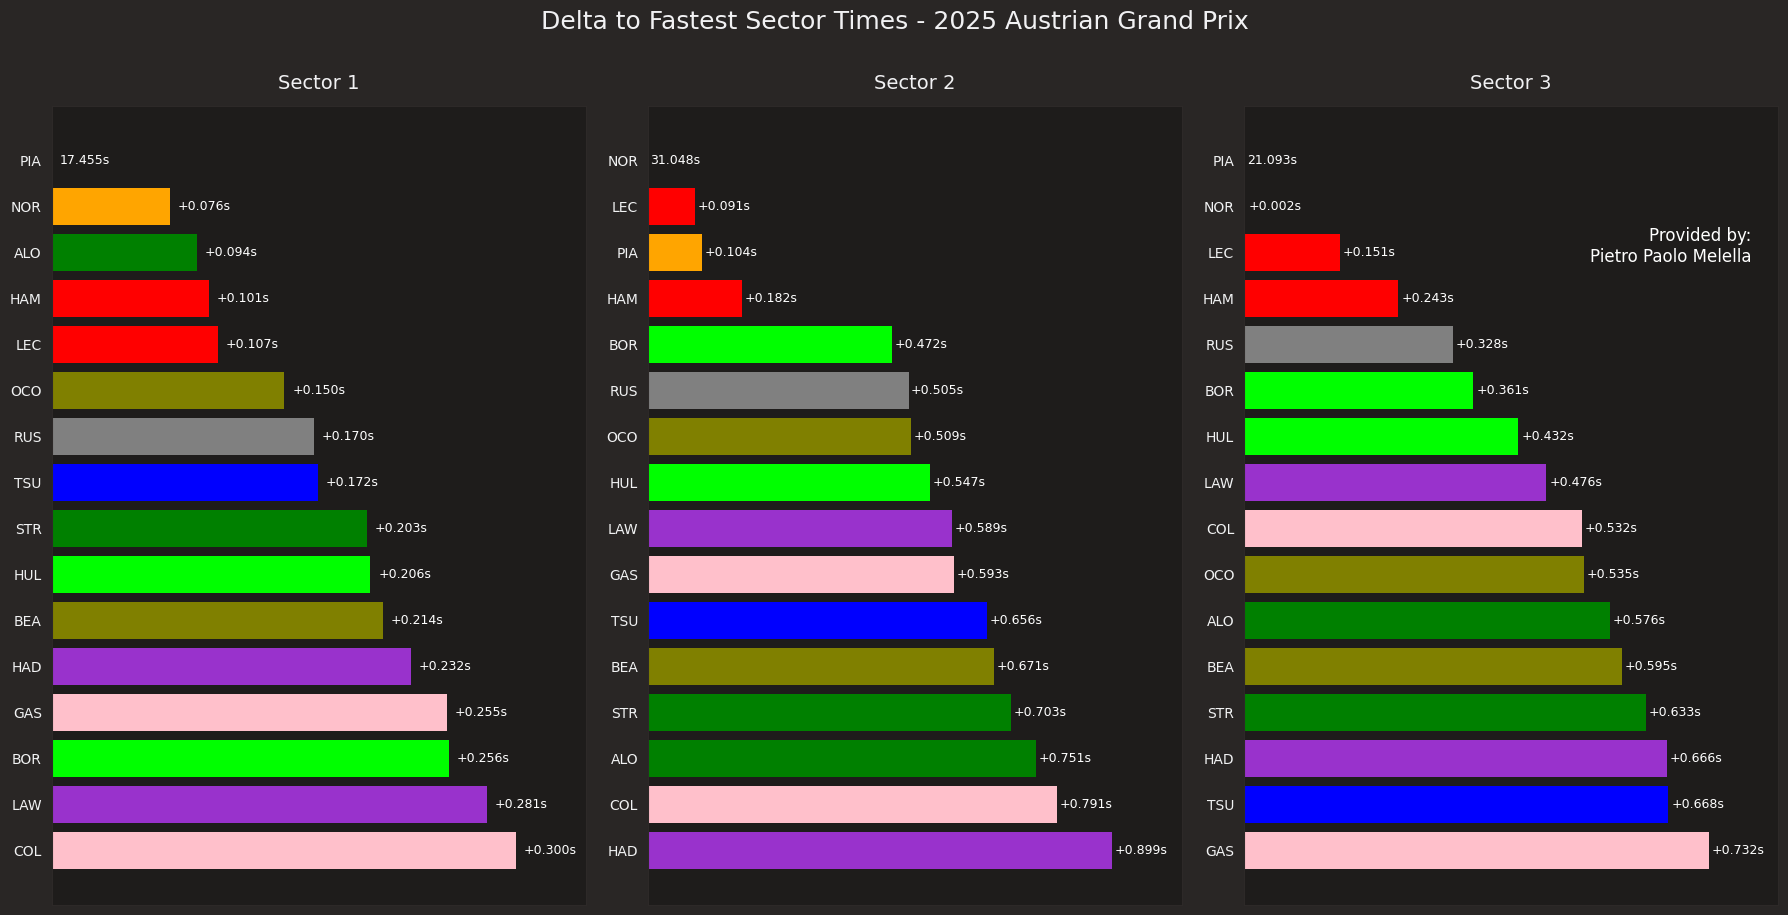

In [17]:
def plot_sector_deltas(
    laps_df,
    colors,
    figsize=(18, 10),
    sharey=False,
    suptitle='Delta to Fastest Sector Times - 2025 Austrian Grand Prix'
):
    """
    Compute per-driver average sector times, their delta to the fastest in each sector,
    and plot three side-by-side horizontal bar charts with annotations.

    Parameters
    ----------
    laps_df : pd.DataFrame
        DataFrame containing at least ['Driver','Sector1Time','Sector2Time','Sector3Time']
        where the SectorXTime columns are timedeltas.
    colors : dict
        Mapping from driver name to a matplotlib color.
    figsize : tuple
        Figure size passed to plt.subplots.
    sharey : bool
        Whether the three subplots share the same y-axis.
    suptitle : str
        The figure’s overall title.
    """
    # 1) average and convert to seconds
    avg = (
        laps_df
        .groupby('Driver')[['Sector1Time','Sector2Time','Sector3Time']]
        .mean()
        .reset_index()
    )
    for col in ['Sector1Time','Sector2Time','Sector3Time']:
        avg[col] = avg[col].dt.total_seconds()

    # 2) compute deltas
    for col in ['Sector1Time','Sector2Time','Sector3Time']:
        best = avg[col].min()
        avg[col.replace('Time','_Delta')] = avg[col] - best

    # 3) prepare sorted DataFrames
    s1 = avg[['Driver','Sector1Time','Sector1_Delta']].sort_values('Sector1_Delta')
    s2 = avg[['Driver','Sector2Time','Sector2_Delta']].sort_values('Sector2_Delta')
    s3 = avg[['Driver','Sector3Time','Sector3_Delta']].sort_values('Sector3_Delta')

    # 4) plot
    fig, axes = plt.subplots(1, 3, figsize=figsize, sharey=sharey)
    config = [
        ("Sector 1", s1, 'Sector1Time', 'Sector1_Delta'),
        ("Sector 2", s2, 'Sector2Time', 'Sector2_Delta'),
        ("Sector 3", s3, 'Sector3Time', 'Sector3_Delta'),
    ]

    for ax, (title, df, time_col, delta_col) in zip(axes, config):
        drivers = df['Driver']
        avg_times = df[time_col]
        deltas    = df[delta_col]
        cols      = [colors.get(d, 'black') for d in drivers]

        bars = ax.barh(drivers, deltas, color=cols)
        for bar, d, t in zip(bars, deltas, avg_times):
            txt = f"{t:.3f}s" if d == 0 else f"+{d:.3f}s"
            ax.text(
                bar.get_width() + 0.005,
                bar.get_y() + bar.get_height()/2,
                txt,
                va='center', ha='left',
                fontsize=9, color='white'
            )
        pad = deltas.max() * 0.15
        ax.set_xlim(0, deltas.max() + pad)
        ax.set_title(title, fontsize=14)
        ax.invert_yaxis()
        ax.tick_params(left=False, labelleft=True,
                       bottom=False, labelbottom=False)
        ax.set_xlabel("")
        ax.grid(False)

    plt.text(
    0.95, 0.8, 'Provided by:\nPietro Paolo Melella',
    verticalalignment='bottom', horizontalalignment='right',
    transform=plt.gca().transAxes,
    color='White', fontsize=12
)
    plt.suptitle(suptitle, fontsize=18, y=0.94)
    plt.tight_layout(rect=[0, 0.03, 1, 0.93])
    plt.show()
    return fig, axes

# assuming `transformed_laps` is your DataFrame and `colors` your dict:
fig, axes = plot_sector_deltas(transformed_laps, colors)

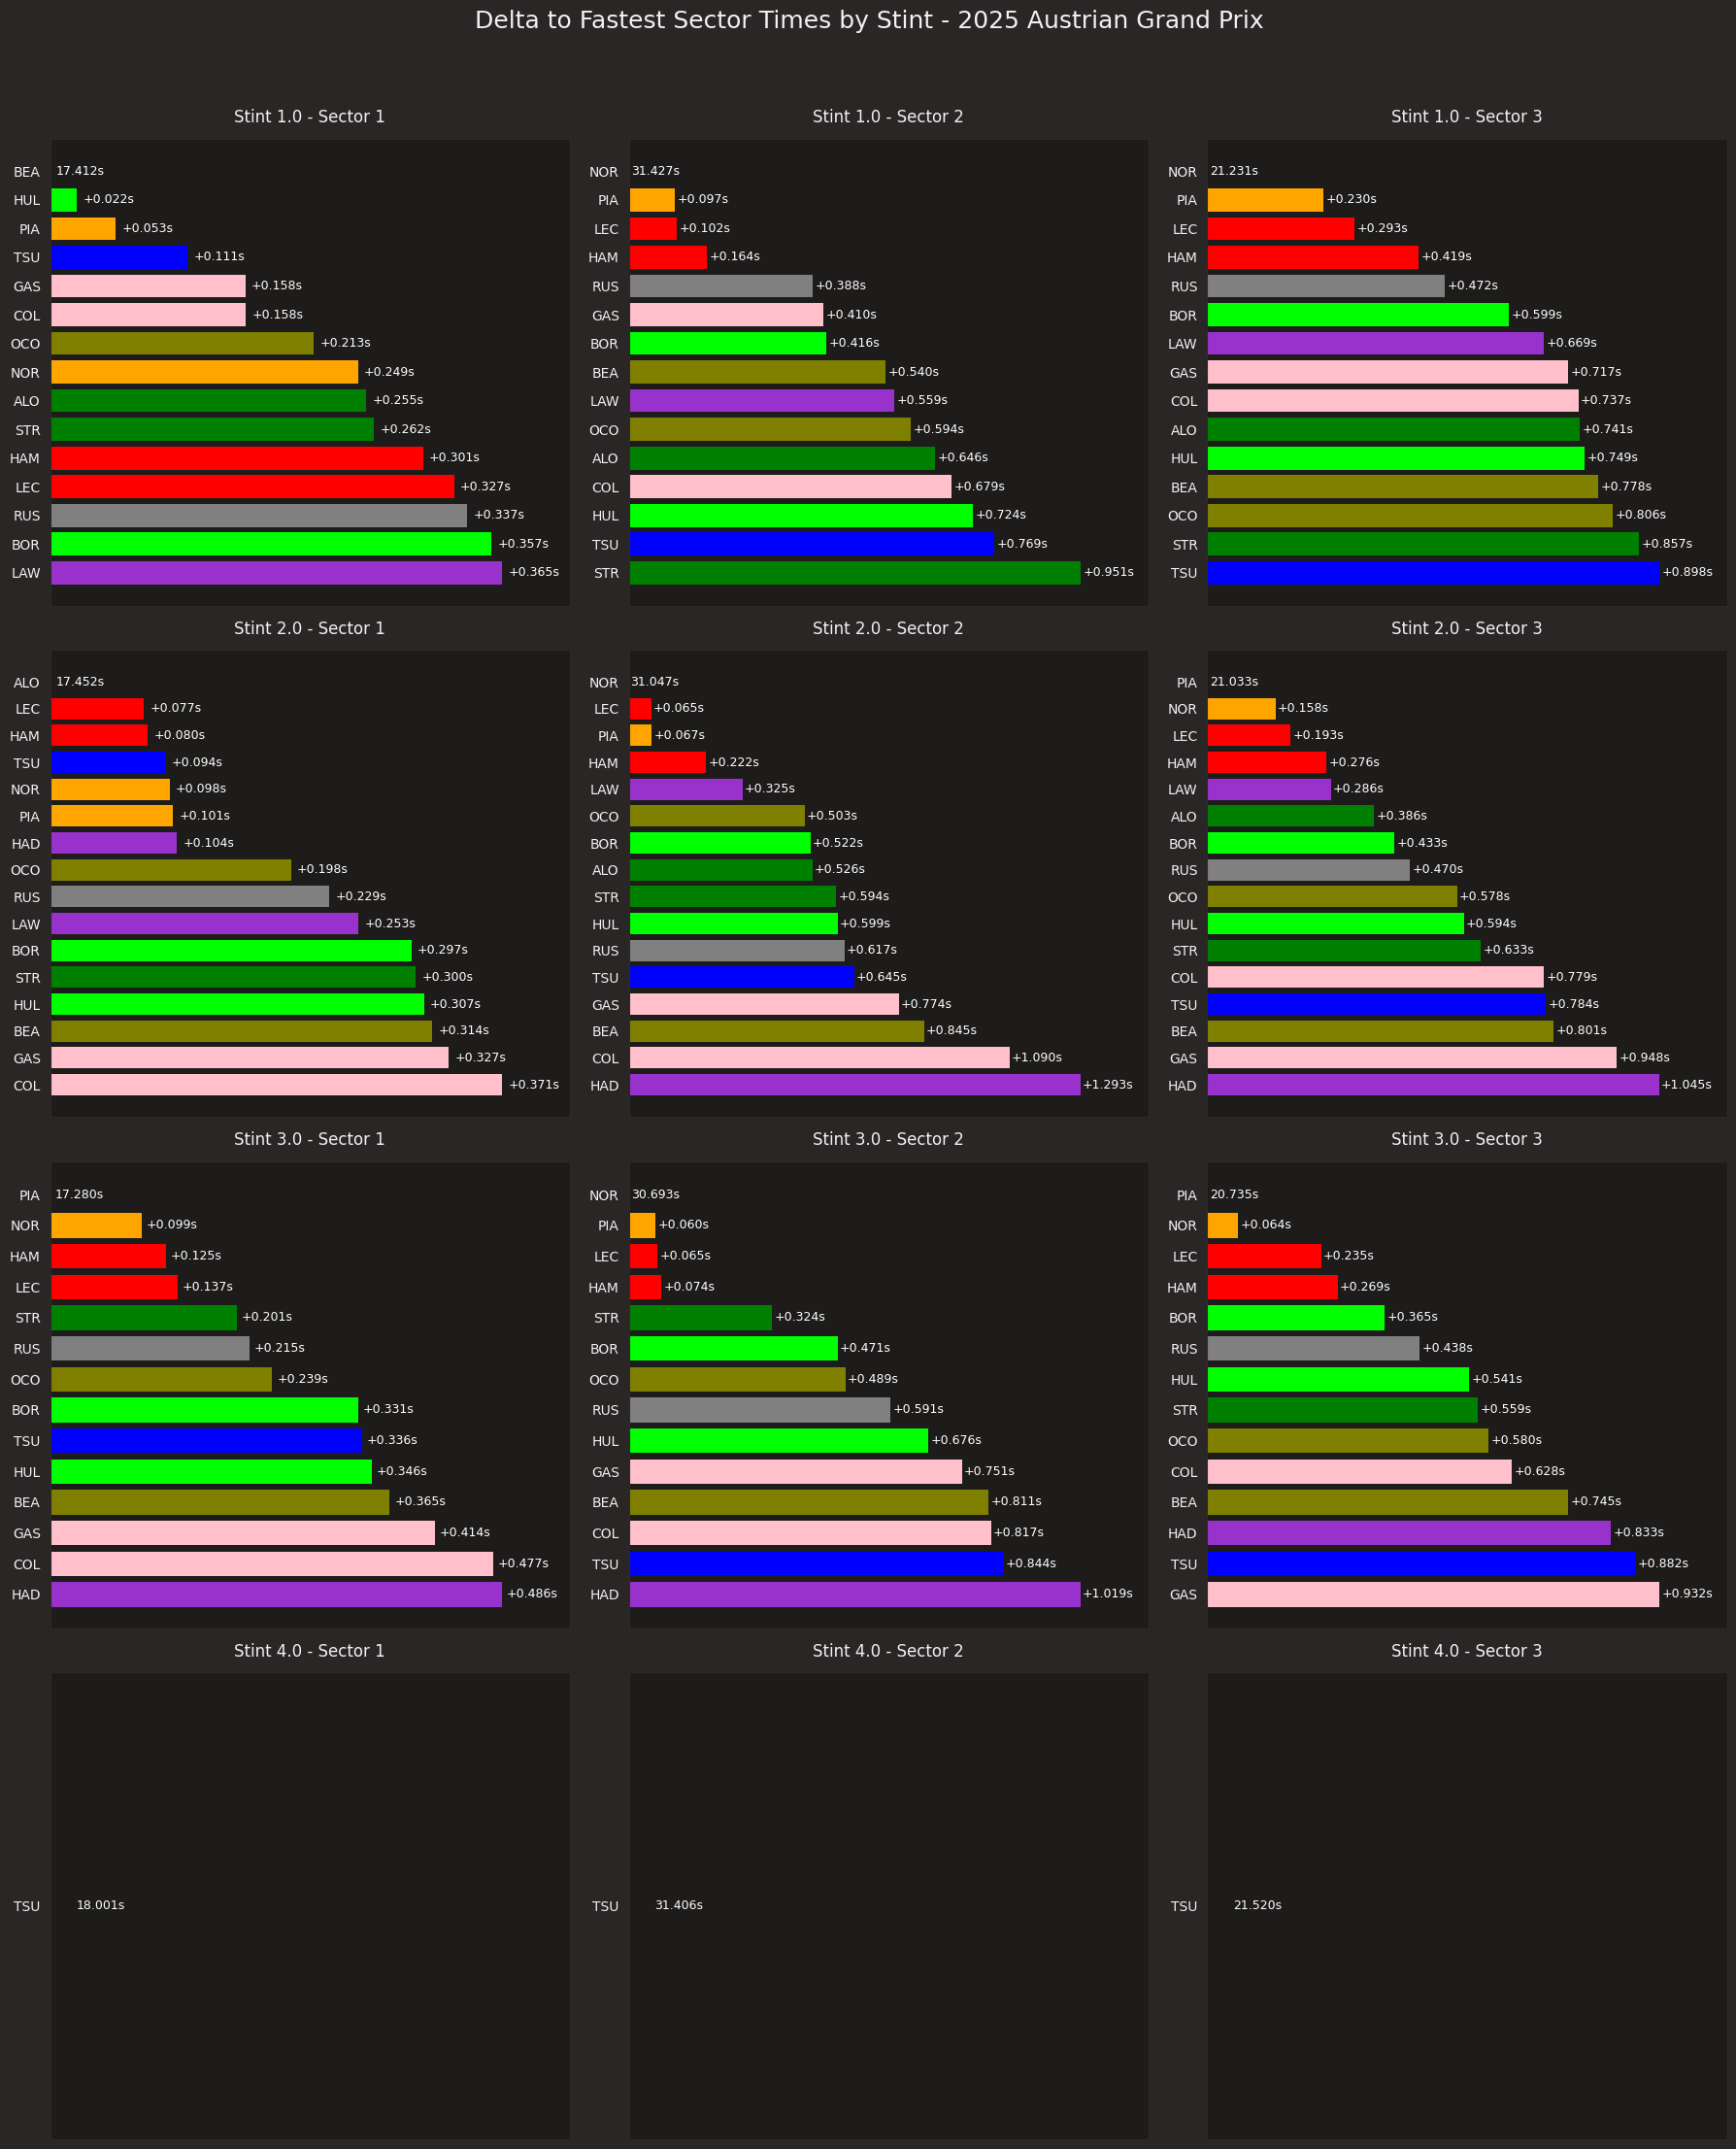

In [20]:
def plot_sector_deltas_by_stint(
    laps_df,
    colors,
    figsize_per_stint=(18, 6),
    sharey=False,
    suptitle='Delta to Fastest Sector Times by Stint - 2025 Austrian Grand Prix'
):
    """
    Compute per-driver average sector times, their delta to the fastest in each sector,
    separately for each stint, and plot a grid of three horizontal bar charts per stint.

    Parameters
    ----------
    laps_df : pd.DataFrame
        DataFrame containing at least ['Driver','Stint','Sector1Time','Sector2Time','Sector3Time']
        where the SectorXTime columns are timedeltas.
    colors : dict
        Mapping from driver name to a matplotlib color.
    figsize_per_stint : tuple
        Figure size for each row of subplots (3 columns) passed to plt.subplots.
    sharey : bool
        Whether plots share the same y-axis within each row.
    suptitle : str
        The figure’s overall title.
    """
    # 1) average times per driver per stint and convert to seconds
    avg = (
        laps_df
        .groupby(['Stint', 'Driver'])[['Sector1Time','Sector2Time','Sector3Time']]
        .mean()
        .reset_index()
    )
    for col in ['Sector1Time','Sector2Time','Sector3Time']:
        avg[col] = avg[col].dt.total_seconds()

    # 2) find number of stints and set up figure
    stints = sorted(avg['Stint'].unique())
    n_stints = len(stints)
    fig, axes = plt.subplots(
        n_stints, 3,
        figsize=(figsize_per_stint[0], figsize_per_stint[1] * n_stints),
        sharey=sharey
    )

    # ensure axes is 2D array
    axes = np.atleast_2d(axes)

    # 3) iterate over stints
    for row_idx, stint in enumerate(stints):
        sub = avg[avg['Stint'] == stint].copy()  # avoid SettingWithCopy
        # compute deltas within this stint
        for col in ['Sector1Time','Sector2Time','Sector3Time']:
            best = sub[col].min()
            sub.loc[:, col.replace('Time', '_Delta')] = sub[col] - best

        # prepare sorted data for each sector
        sector_data = []
        for i in (1, 2, 3):
            time_col = f'Sector{i}Time'
            delta_col = f'Sector{i}_Delta'
            df_sorted = sub[['Driver', time_col, delta_col]].sort_values(delta_col)
            sector_data.append((f'Sector {i}', df_sorted, time_col, delta_col))

        # plot three charts for this stint
        for col_idx, (title, df_sec, time_col, delta_col) in enumerate(sector_data):
            ax = axes[row_idx][col_idx]
            drivers = df_sec['Driver'].tolist()
            avg_times = df_sec[time_col].tolist()
            deltas    = df_sec[delta_col].tolist()
            cols      = [colors.get(d, 'black') for d in drivers]

            bars = ax.barh(drivers, deltas, color=cols)
            for bar, d, t in zip(bars, deltas, avg_times):
                txt = f"{t:.3f}s" if d == 0 else f"+{d:.3f}s"
                ax.text(
                    bar.get_width() + 0.005,
                    bar.get_y() + bar.get_height() / 2,
                    txt,
                    va='center', ha='left', fontsize=9, color='white'
                )

            # avoid singular x-limits when all deltas are zero
            max_delta = max(deltas) if deltas else 0
            pad = max_delta * 0.15
            upper = max_delta + pad
            if upper <= 0:
                upper = 0.1
            ax.set_xlim(0, upper)

            ax.set_title(f"Stint {stint} - {title}", fontsize=12)
            ax.invert_yaxis()
            ax.tick_params(left=False, labelleft=True,
                           bottom=False, labelbottom=False)
            ax.set_xlabel("")
            ax.grid(False)

    # overall title and footer
    plt.suptitle(suptitle, fontsize=18, y=0.95)
    fig.tight_layout(rect=[0, 0.03, 1, 0.93])
    plt.show()
    return fig, axes

fig1, axes1 = plot_sector_deltas_by_stint(transformed_laps, colors)


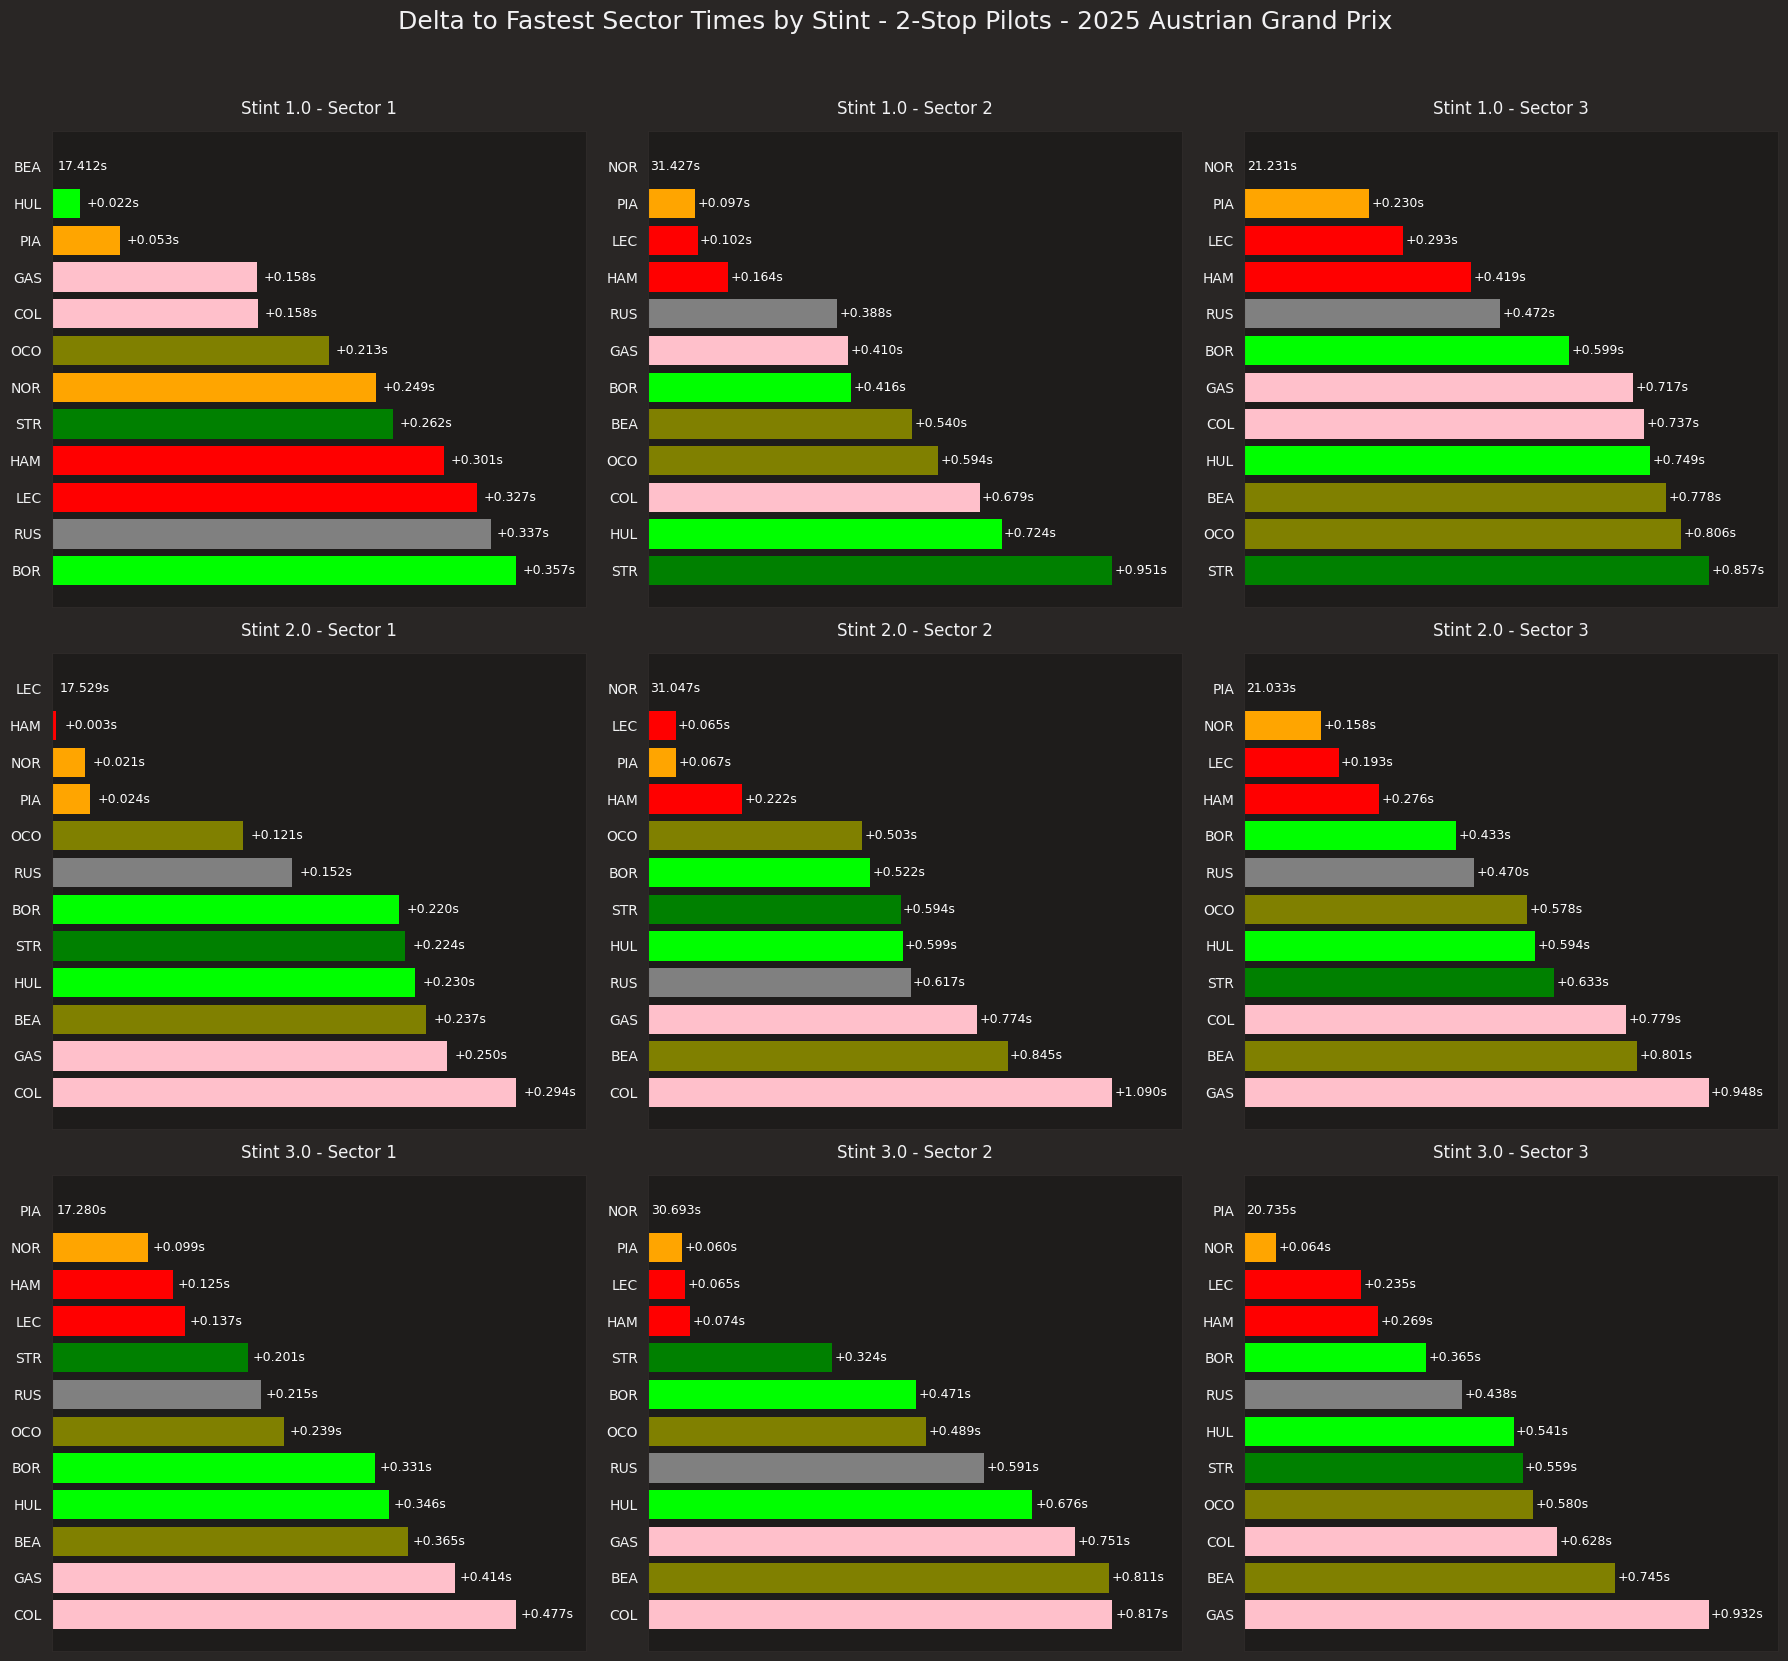

In [21]:
def plot_two_stop_sector_deltas_by_stint(
    laps_df,
    colors,
    figsize_per_stint=(18, 6),
    sharey=False,
    suptitle='Delta to Fastest Sector Times by Stint - 2-Stop Pilots - 2025 Austrian Grand Prix'
):
    """
    Filter to drivers who made exactly two pit stops (three stints),
    compute per-driver average sector times, their delta to the fastest in each sector,
    separately for each stint, and plot a grid of three horizontal bar charts per stint.

    Parameters
    ----------
    laps_df : pd.DataFrame
        DataFrame containing at least ['Driver','Stint','Sector1Time','Sector2Time','Sector3Time']
        where 'Stint' increments at each pit stop, and the SectorXTime columns are timedeltas.
    colors : dict
        Mapping from driver name to a matplotlib color.
    figsize_per_stint : tuple
        Figure size per row of subplots (3 columns).
    sharey : bool
        Whether plots share the same y-axis within each row.
    suptitle : str
        The overall figure title.

    Returns
    -------
    fig, axes : matplotlib Figure and Axes array
    """
    import numpy as np
    import matplotlib.pyplot as plt

    # Identify drivers with exactly two stops (i.e., three stints)
    stint_counts = laps_df.groupby('Driver')['Stint'].nunique()
    two_stop_drivers = stint_counts[stint_counts == 3].index

    # Filter laps to only those drivers
    filtered = laps_df[laps_df['Driver'].isin(two_stop_drivers)].copy()

    # Use the existing sector-delta plotting logic
    return plot_sector_deltas_by_stint(
        filtered,
        colors,
        figsize_per_stint=figsize_per_stint,
        sharey=sharey,
        suptitle=suptitle
    )

# Example usage:
fig2, axes2 = plot_two_stop_sector_deltas_by_stint(transformed_laps, colors)